# Solução Proposta - Competição DSA de Machine Learning
# Edição Março/2019

https://www.kaggle.com/c/competicao-dsa-machine-learning-mar-2019

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
df_store = pd.read_csv('lojas.csv')
df = pd.read_csv('dataset_treino.csv', low_memory=False)
df = df.merge(df_store, on = 'Store')

In [4]:
df_test = pd.read_csv('dataset_teste.csv', low_memory=False)
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


### Análise Exploratória

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df.Date.apply(lambda dt: dt.month)
df['Year'] = df.Date.apply(lambda dt: dt.year)
df['WeekOfYear'] = df.Date.apply(lambda dt: dt.weekofyear)
df['Day'] = df.Date.apply(lambda dt: dt.day)

df['isMonthEnd'] = df.Date.apply(lambda dt: dt.is_month_end)
df['isMonthStart'] = df.Date.apply(lambda dt: dt.is_month_start)
df['isQuarterEnd'] = df.Date.apply(lambda dt: dt.is_quarter_end )
df['isQuarterStart'] = df.Date.apply(lambda dt: dt.is_quarter_start)
df['isYearEnd'] = df.Date.apply(lambda dt: dt.is_year_end)
df['isYearStart'] = df.Date.apply(lambda dt: dt.is_year_start)

In [7]:
features = []
for feat in df.columns.drop('Sales'):
    if df[feat].dtype == np.float64 or df[feat].dtype == np.int64:
        features.append(feat)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

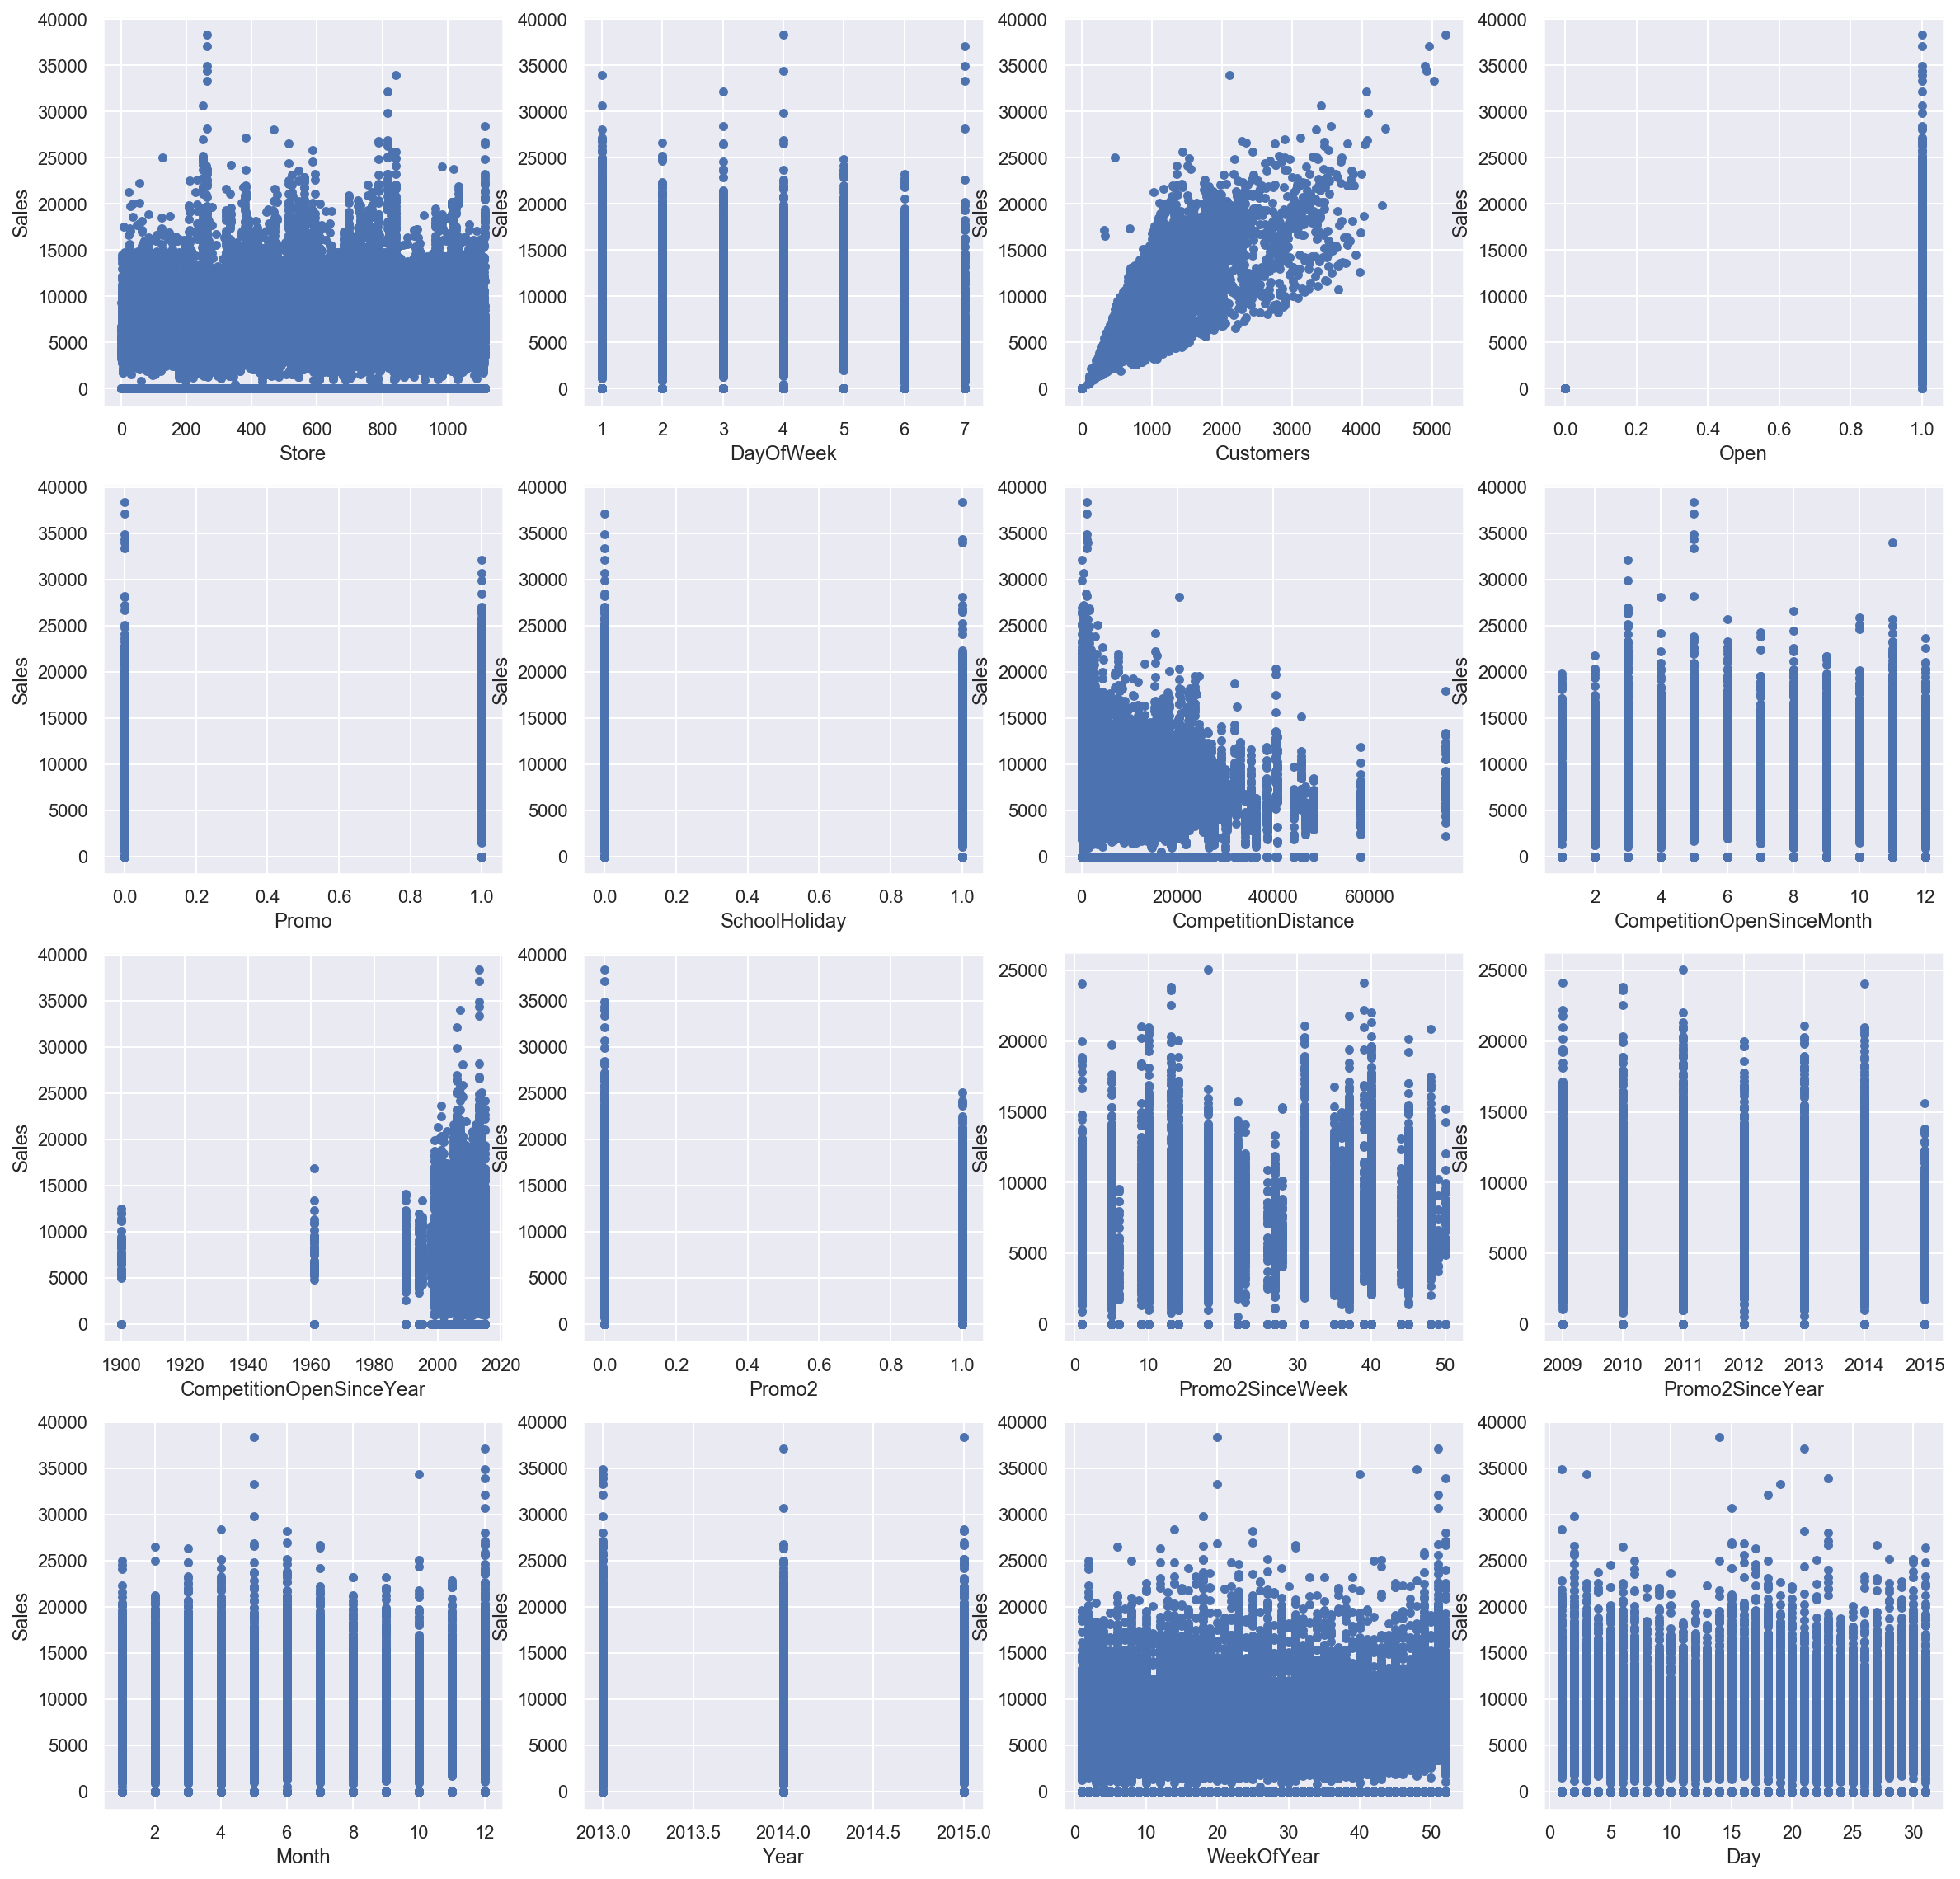

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20));
df_sample = df.sample(frac=0.05)

for idx, feature in enumerate(features):
    df_sample.plot(feature, "Sales", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4]);

In [9]:
import gc 

del df_sample
gc.collect()

281

In [10]:
df[df.columns.drop('Sales')].corrwith(df.Sales)

Store                        0.005126
DayOfWeek                   -0.462125
Customers                    0.894711
Open                         0.678472
Promo                        0.452345
SchoolHoliday                0.085124
CompetitionDistance         -0.019229
CompetitionOpenSinceMonth   -0.028257
CompetitionOpenSinceYear     0.012659
Promo2                      -0.091040
Promo2SinceWeek              0.059558
Promo2SinceYear             -0.021127
Month                        0.048768
Year                         0.023519
WeekOfYear                   0.052946
Day                         -0.011612
isMonthEnd                   0.047112
isMonthStart                -0.053450
isQuarterEnd                 0.027899
isQuarterStart              -0.013222
isYearEnd                   -0.019392
isYearStart                 -0.084589
dtype: float64

In [11]:
df.groupby('StoreType')['Sales'].mean()

StoreType
a     5738.179710
b    10058.837334
c     5723.629246
d     5641.819243
Name: Sales, dtype: float64

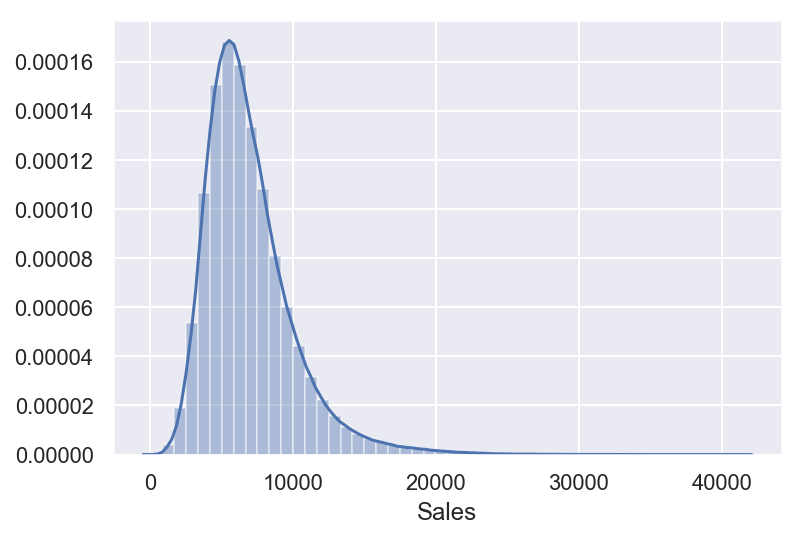

In [12]:
sns.distplot(df.Sales[df.Sales > 0])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 28 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null datetime64[ns]
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 no

In [14]:
df[(pd.isnull(df.Promo2SinceWeek) | pd.isnull(df.Promo2SinceYear)) & df.Promo2 != 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Month,Year,WeekOfYear,Day,isMonthEnd,isMonthStart,isQuarterEnd,isQuarterStart,isYearEnd,isYearStart


### Tratamento de Valores Missing

In [15]:
df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
df['CompetitionOpenSinceYear'].fillna(0, inplace=True)

In [16]:
df['Promo2SinceWeek'].fillna(0, inplace=True)
df['Promo2SinceYear'].fillna(0, inplace=True)

In [17]:
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)
df['CompetitionDistance'] = np.log(df.CompetitionDistance) + 1

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a5cb96cc0>],
      dtype=object)

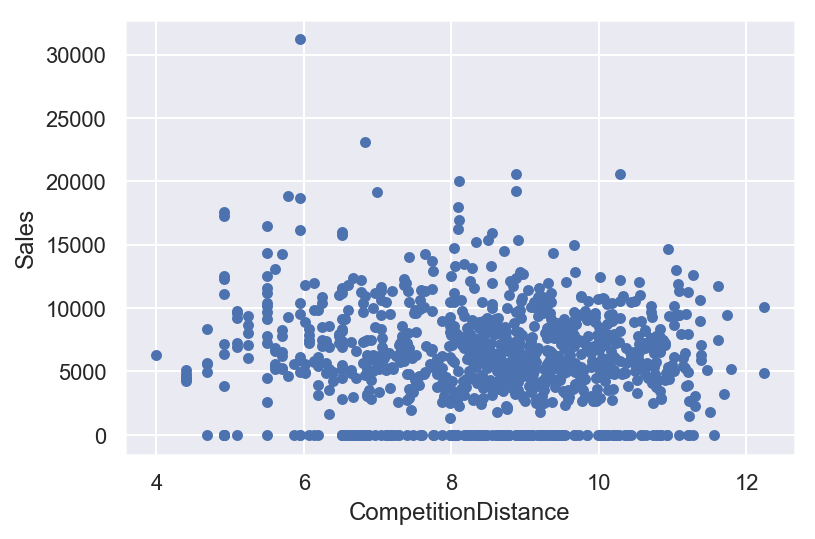

In [18]:
df.sample(frac=.001).plot('CompetitionDistance', "Sales", subplots=True, kind="scatter")

### Outros Tratamentos e Limpezas

In [19]:
df.groupby('Store')['CompetitionDistance'].unique().apply(lambda l: 1 if len(l) > 1 else 0).sum()

0

In [20]:
df['StateHoliday'] = df['StateHoliday'].replace(0, '0')
df['Holiday'] = df.StateHoliday.apply(lambda x: 0 if x == '0' else 1)

df.drop('StateHoliday', axis=1, inplace=True)

In [21]:
df = df.sort_values(by='Date')
df.drop('Date', axis=1, inplace=True)

In [22]:
df = df[(df['Open'] != 0) & (df['Sales'] != 0)]
df.drop('Open', axis=1, inplace=True)

In [23]:
df.PromoInterval.value_counts()

Jan,Apr,Jul,Oct     242397
Feb,May,Aug,Nov      97998
Mar,Jun,Sept,Dec     80651
Name: PromoInterval, dtype: int64

In [24]:
df['isMonthEnd'] = df['isMonthEnd'].astype(int)
df['isMonthStart'] = df['isMonthStart'].astype(int)
df['isQuarterEnd'] = df['isQuarterEnd'].astype(int)
df['isQuarterStart'] = df['isQuarterStart'].astype(int)
df['isYearEnd'] = df['isYearEnd'].astype(int)
df['isYearStart'] = df['isYearStart'].astype(int)

In [25]:
df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + \
        (df.Month - df.CompetitionOpenSinceMonth)
    
# Promo open time
df['PromoOpen'] = 12 * (df.Year - df.Promo2SinceYear) + \
        (df.WeekOfYear - df.Promo2SinceWeek) / 4.0

df = pd.get_dummies(df, columns=['DayOfWeek', 'StoreType', 'Assortment','PromoInterval'], dummy_na=True)

### Calculando a Métrica

In [26]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score, make_scorer

def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w


def rmspe(yhat, y):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe


def rmspe_xg(yhat, y):
    # y = y.values
    y = y.get_label()
    y = np.exp(y) - 1
    yhat = np.exp(yhat) - 1
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return "rmspe", rmspe

### Modelagem Preditiva

In [27]:
!pip install xgboost

In [28]:
!pip install hyperopt

    100% |████████████████████████████████| 122kB 2.9MB/s ta 0:00:01
    100% |████████████████████████████████| 317kB 10.8MB/s ta 0:00:01


In [29]:
import xgboost as xgb
from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def train(index, train, hp_selection=False):
    train_store = train[index]
    X = train_store[train_store.columns.drop(['Sales', 'Store', 'Customers'])]
    y = train_store['Sales']

    train_size = int(X.shape[0]*.99)
    print(f'Regressor for {index} store\nTraining on {X.shape[0]} samples')
    X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
    X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]

    xtrain = xgb.DMatrix(X_train, np.log(y_train.values) + 1)
    xtest = xgb.DMatrix(X_test, np.log(y_test.values) + 1)
    
    if hp_selection:
        def score(params):
            num_round = 200
            model = xgb.train(params, xtrain, num_round, feval=rmspe_xg)
            predictions = model.predict(xtest)
            score = rmspe(y=y_test, yhat=predictions)
            return {'loss': score, 'status': STATUS_OK}
        
        def optimize(trials):
            space = {
                     'n_estimators' : hp.quniform('n_estimators', 1, 1000, 1),
                     'eta' : hp.quniform('eta', 0.2, 0.825, 0.025),
                     'max_depth' : hp.choice('max_depth', np.arange(1, 14, dtype=int)),
                     'min_child_weight' : hp.quniform('min_child_weight', 1, 6, 1),
                     'subsample' : hp.quniform('subsample', 0.7, 1, 0.05),
                     'gamma' : hp.quniform('gamma', 0.5, 1, 0.05),
                     'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.05),
                     'eval_metric': 'rmse',
                     'objective': 'reg:linear',
                     'nthread': 4,
                     'silent' : 1
                     }

            best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=250)
            return best
        
        trials = Trials()
        best_opts = optimize(trials)
        best_opts['silent'] = 1
    else:
        best_opts = {'colsample_bytree': 0.7, 
                  'eta': 0.625, 
                  'gamma': 0.8, 
                  'max_depth': 6,
                  'eval_metric': 'rmse',
                  'min_child_weight': 6.0, 
                  'n_estimators': 8.0,  # 585
                  'silent': 1,
                  'nthread': 4,
                  'subsample': 0.95}
        
    watchlist = [(xtrain, 'train'), (xtest, 'eval')]
    num_round = 10000
    regressor = xgb.train(best_opts, xtrain, num_round, watchlist, feval=rmspe_xg,
                          verbose_eval=10, early_stopping_rounds=50)
    print("Validating")
    train_probs = regressor.predict(xtest)
    indices = train_probs < 0
    train_probs[indices] = 0
    error = rmspe(np.exp(train_probs) - 1, y_test.values)
    print('error', error)
    regressor = xgb.train(best_opts, xtest, 10, feval=rmspe_xg, xgb_model=regressor)
    return regressor

In [30]:
df_test = pd.read_csv('dataset_teste.csv', low_memory=False)
closed_store_ids = df_test["Id"][df_test["Open"] == 0].values

df_test = df_test.merge(df_store, on='Store')
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['Month'] = df_test.Date.apply(lambda dt: dt.month)
df_test['Year'] = df_test.Date.apply(lambda dt: dt.year)
df_test['WeekOfYear'] = df_test.Date.apply(lambda dt: dt.weekofyear)
df_test['Day'] = df_test.Date.apply(lambda dt: dt.day)

df_test['isMonthEnd'] = df_test.Date.apply(lambda dt: dt.is_month_end).astype(int)
df_test['isMonthStart'] = df_test.Date.apply(lambda dt: dt.is_month_start).astype(int)
df_test['isQuarterEnd'] = df_test.Date.apply(lambda dt: dt.is_quarter_end ).astype(int)
df_test['isQuarterStart'] = df_test.Date.apply(lambda dt: dt.is_quarter_start).astype(int)
df_test['isYearEnd'] = df_test.Date.apply(lambda dt: dt.is_year_end).astype(int)
df_test['isYearStart'] = df_test.Date.apply(lambda dt: dt.is_year_start).astype(int)

df_test['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
df_test['CompetitionOpenSinceYear'].fillna(0, inplace=True)

df_test['Promo2SinceWeek'].fillna(0, inplace=True)
df_test['Promo2SinceYear'].fillna(0, inplace=True)

df_test['CompetitionDistance'].fillna(df_test['CompetitionDistance'].median(), inplace=True)

df_test['StateHoliday'] = df_test['StateHoliday'].replace(0, '0')
df_test['Holiday'] = df_test.StateHoliday.apply(lambda x: 0 if x == '0' else 1)

df_test.drop('StateHoliday', axis=1, inplace=True)
df_test.drop('Date', axis=1, inplace=True)

# competition open time (in months)
df_test['CompetitionOpen'] = 12 * (df_test.Year - df_test.CompetitionOpenSinceYear) + \
        (df_test.Month - df_test.CompetitionOpenSinceMonth)
    
# Promo open time
df_test['PromoOpen'] = 12 * (df_test.Year - df_test.Promo2SinceYear) + \
        (df_test.WeekOfYear - df_test.Promo2SinceWeek) / 4.0

df_test.drop(['Open'], axis=1, inplace=True)

df_test = pd.get_dummies(df_test, columns=['DayOfWeek', 'StoreType', 'Assortment','PromoInterval'], dummy_na=True)

In [31]:
store_grouped = dict(list(df.groupby('Store')))
test_grouped = dict(list(df_test.groupby('Store')))

In [32]:
submission = pd.Series(np.zeros(df_test.Id.shape))
submission.index += 1

for store in test_grouped:
    test = test_grouped[store].copy()
    ids = test['Id']
    dpred = xgb.DMatrix(test[test.columns.drop(['Id', 'Store'])]) 
    regressor = train(store, store_grouped)
    preds = regressor.predict(dpred)
    preds[preds < 0] = 0
    preds = np.exp(preds) - 1
    submission[ids] = preds

submission[closed_store_ids] = 0

Regressor for 1 store
Training on 781 samples
[0]	train-rmse:3.36977	eval-rmse:3.37475	train-rmspe:0.964767	eval-rmspe:0.965303
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.135813	eval-rmse:0.083864	train-rmspe:0.137901	eval-rmspe:0.078093
[20]	train-rmse:0.132569	eval-rmse:0.092637	train-rmspe:0.135917	eval-rmspe:0.088041
[30]	train-rmse:0.129175	eval-rmse:0.075689	train-rmspe:0.132783	eval-rmspe:0.073596
[40]	train-rmse:0.129177	eval-rmse:0.075732	train-rmspe:0.132844	eval-rmspe:0.073674
[50]	train-rmse:0.129176	eval-rmse:0.075463	train-rmspe:0.132441	eval-rmspe:0.073168
[60]	train-rmse:0.129174	eval-rmse:0.075489	train-rmspe:0.132483	eval-rmspe:0.073219
[70]	train-rmse:0.129173	eval-rmse:0.075539	train-rmspe:0.132561	eval-rmspe:0.073316
[80]	train-rmse:0.129172	eval-rmse:0.075543	train-rmspe:0.132566	eval-rmspe:0.073323
[90]	train-rmse:0.129174	eval-rmse:0.075679	tra

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.156065	eval-rmse:0.138048	train-rmspe:0.153238	eval-rmspe:0.126236
[20]	train-rmse:0.152393	eval-rmse:0.139959	train-rmspe:0.15173	eval-rmspe:0.127709
[30]	train-rmse:0.152401	eval-rmse:0.138262	train-rmspe:0.152367	eval-rmspe:0.126401
[40]	train-rmse:0.152391	eval-rmse:0.13909	train-rmspe:0.152048	eval-rmspe:0.127038
[50]	train-rmse:0.152392	eval-rmse:0.13988	train-rmspe:0.151758	eval-rmspe:0.127648
[60]	train-rmse:0.152395	eval-rmse:0.138597	train-rmspe:0.152236	eval-rmspe:0.126658
Stopping. Best iteration:
[12]	train-rmse:0.156062	eval-rmse:0.136794	train-rmspe:0.153716	eval-rmspe:0.125275

Validating
error 1.5326701687251951
Regressor for 14 store
Training on 779 samples
[0]	train-rmse:3.41952	eval-rmse:3.37654	train-rmspe:0.965753	eval-rmspe:0.964387
Multiple eval metrics have been passed: 'eval-rmspe' will be used for e

[30]	train-rmse:0.13958	eval-rmse:0.138947	train-rmspe:0.138489	eval-rmspe:0.13489
[40]	train-rmse:0.139582	eval-rmse:0.139242	train-rmspe:0.138366	eval-rmspe:0.135069
[50]	train-rmse:0.13958	eval-rmse:0.138979	train-rmspe:0.138476	eval-rmspe:0.134909
[60]	train-rmse:0.139586	eval-rmse:0.138303	train-rmspe:0.138772	eval-rmspe:0.134499
Stopping. Best iteration:
[14]	train-rmse:0.139591	eval-rmse:0.138072	train-rmspe:0.138878	eval-rmspe:0.13436

Validating
error 1.5912935462715152
Regressor for 22 store
Training on 619 samples
[0]	train-rmse:3.35188	eval-rmse:3.58109	train-rmspe:0.963756	eval-rmspe:0.971429
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.138161	eval-rmse:0.162282	train-rmspe:0.13511	eval-rmspe:0.146504
[20]	train-rmse:0.138164	eval-rmse:0.161527	train-rmspe:0.135287	eval-rmspe:0.145865
[30]	train-rmse:0.138163	eval-rmse:0.161673	train-rmspe:0.135253	eval-rms

Validating
error 2.2315612606003206
Regressor for 31 store
Training on 784 samples
[0]	train-rmse:3.44833	eval-rmse:3.51416	train-rmspe:0.967354	eval-rmspe:0.969804
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.128304	eval-rmse:0.109505	train-rmspe:0.126953	eval-rmspe:0.107163
[20]	train-rmse:0.128304	eval-rmse:0.109486	train-rmspe:0.126973	eval-rmspe:0.10716
[30]	train-rmse:0.128304	eval-rmse:0.109396	train-rmspe:0.127069	eval-rmspe:0.107151
[40]	train-rmse:0.128303	eval-rmse:0.109465	train-rmspe:0.126995	eval-rmspe:0.107158
[50]	train-rmse:0.128304	eval-rmse:0.109501	train-rmspe:0.126957	eval-rmspe:0.107162
[60]	train-rmse:0.128304	eval-rmse:0.109361	train-rmspe:0.127108	eval-rmspe:0.107148
Stopping. Best iteration:
[16]	train-rmse:0.128307	eval-rmse:0.109264	train-rmspe:0.12722	eval-rmspe:0.107141

Validating
error 1.7067506566424537
Regressor for 32 store
Training on

[30]	train-rmse:0.158044	eval-rmse:0.104941	train-rmspe:0.159151	eval-rmspe:0.100282
[40]	train-rmse:0.158045	eval-rmse:0.10447	train-rmspe:0.159368	eval-rmspe:0.099929
[50]	train-rmse:0.154592	eval-rmse:0.092384	train-rmspe:0.155607	eval-rmspe:0.092001
[60]	train-rmse:0.154597	eval-rmse:0.093127	train-rmspe:0.154949	eval-rmspe:0.092351
[70]	train-rmse:0.15459	eval-rmse:0.092892	train-rmspe:0.155144	eval-rmspe:0.092235
[80]	train-rmse:0.15459	eval-rmse:0.0929	train-rmspe:0.155137	eval-rmspe:0.092239
[90]	train-rmse:0.15459	eval-rmse:0.092864	train-rmspe:0.155168	eval-rmspe:0.092222
[100]	train-rmse:0.15459	eval-rmse:0.092474	train-rmspe:0.15552	eval-rmspe:0.092041
[110]	train-rmse:0.154599	eval-rmse:0.093161	train-rmspe:0.154922	eval-rmspe:0.092369
[120]	train-rmse:0.15459	eval-rmse:0.092463	train-rmspe:0.155531	eval-rmspe:0.092036
[130]	train-rmse:0.154588	eval-rmse:0.09266	train-rmspe:0.155348	eval-rmspe:0.092125
[140]	train-rmse:0.15459	eval-rmse:0.092893	train-rmspe:0.155143	eval-r

Stopping. Best iteration:
[50]	train-rmse:0.133864	eval-rmse:0.106397	train-rmspe:0.132126	eval-rmspe:0.100133

Validating
error 1.4645445830765587
Regressor for 50 store
Training on 779 samples
[0]	train-rmse:3.32422	eval-rmse:3.49088	train-rmspe:0.962357	eval-rmspe:0.9689
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.141782	eval-rmse:0.06471	train-rmspe:0.149447	eval-rmspe:0.061513
[20]	train-rmse:0.141779	eval-rmse:0.064276	train-rmspe:0.1496	eval-rmspe:0.061124
[30]	train-rmse:0.141781	eval-rmse:0.063845	train-rmspe:0.149757	eval-rmspe:0.060738
[40]	train-rmse:0.14178	eval-rmse:0.064529	train-rmspe:0.14951	eval-rmspe:0.061351
[50]	train-rmse:0.141779	eval-rmse:0.064241	train-rmspe:0.149612	eval-rmspe:0.061093
[60]	train-rmse:0.141779	eval-rmse:0.064293	train-rmspe:0.149594	eval-rmspe:0.061139
[70]	train-rmse:0.141785	eval-rmse:0.063461	train-rmspe:0.149902	eval-rmspe

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.144742	eval-rmse:0.131007	train-rmspe:0.147528	eval-rmspe:0.119802
[20]	train-rmse:0.144745	eval-rmse:0.130495	train-rmspe:0.147718	eval-rmspe:0.119401
[30]	train-rmse:0.144743	eval-rmse:0.130693	train-rmspe:0.147644	eval-rmspe:0.119556
[40]	train-rmse:0.144742	eval-rmse:0.131284	train-rmspe:0.147429	eval-rmspe:0.120018
[50]	train-rmse:0.144742	eval-rmse:0.131219	train-rmspe:0.147452	eval-rmspe:0.119967
[60]	train-rmse:0.144743	eval-rmse:0.130631	train-rmspe:0.147667	eval-rmspe:0.119507
[70]	train-rmse:0.144747	eval-rmse:0.130322	train-rmspe:0.147784	eval-rmspe:0.119266
[80]	train-rmse:0.144743	eval-rmse:0.130753	train-rmspe:0.147622	eval-rmspe:0.119603
[90]	train-rmse:0.144742	eval-rmse:0.130847	train-rmspe:0.147587	eval-rmspe:0.119676
Stopping. Best iteration:
[45]	train-rmse:0.14475	eval-rmse:0.130142	train-rmspe:0.147853	

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.13085	eval-rmse:0.124957	train-rmspe:0.133401	eval-rmspe:0.13437
[20]	train-rmse:0.130851	eval-rmse:0.124877	train-rmspe:0.133351	eval-rmspe:0.134245
[30]	train-rmse:0.130849	eval-rmse:0.125182	train-rmspe:0.133542	eval-rmspe:0.134719
[40]	train-rmse:0.130849	eval-rmse:0.12504	train-rmspe:0.133453	eval-rmspe:0.134499
[50]	train-rmse:0.130849	eval-rmse:0.12523	train-rmspe:0.133573	eval-rmspe:0.134794
Stopping. Best iteration:
[5]	train-rmse:0.133847	eval-rmse:0.119319	train-rmspe:0.130976	eval-rmspe:0.123851

Validating
error 1.8776185441091526
Regressor for 72 store
Training on 623 samples
[0]	train-rmse:3.33724	eval-rmse:3.49659	train-rmspe:0.961078	eval-rmspe:0.966058
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rm

Validating
error 1.5121932835497012
Regressor for 80 store
Training on 779 samples
[0]	train-rmse:3.54373	eval-rmse:3.73033	train-rmspe:0.970082	eval-rmspe:0.975931
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.135294	eval-rmse:0.130122	train-rmspe:0.150659	eval-rmspe:0.119848
[20]	train-rmse:0.135298	eval-rmse:0.129229	train-rmspe:0.150875	eval-rmspe:0.119063
[30]	train-rmse:0.135294	eval-rmse:0.13003	train-rmspe:0.150681	eval-rmspe:0.119768
[40]	train-rmse:0.135294	eval-rmse:0.129987	train-rmspe:0.150691	eval-rmspe:0.119729
[50]	train-rmse:0.135295	eval-rmse:0.129586	train-rmspe:0.150788	eval-rmspe:0.119377
[60]	train-rmse:0.135294	eval-rmse:0.129904	train-rmspe:0.150711	eval-rmspe:0.119657
[70]	train-rmse:0.135294	eval-rmse:0.129772	train-rmspe:0.150743	eval-rmspe:0.11954
[80]	train-rmse:0.135296	eval-rmse:0.130894	train-rmspe:0.150477	eval-rmspe:0.120526
Stopping. Be

[40]	train-rmse:0.140983	eval-rmse:0.131162	train-rmspe:0.156286	eval-rmspe:0.120191
[50]	train-rmse:0.140974	eval-rmse:0.131829	train-rmspe:0.156017	eval-rmspe:0.120699
[60]	train-rmse:0.140979	eval-rmse:0.13137	train-rmspe:0.156201	eval-rmspe:0.120349
[70]	train-rmse:0.140974	eval-rmse:0.13222	train-rmspe:0.155865	eval-rmspe:0.120997
[80]	train-rmse:0.140974	eval-rmse:0.131842	train-rmspe:0.156012	eval-rmspe:0.120709
[90]	train-rmse:0.140974	eval-rmse:0.131869	train-rmspe:0.156001	eval-rmspe:0.12073
Stopping. Best iteration:
[40]	train-rmse:0.140983	eval-rmse:0.131162	train-rmspe:0.156286	eval-rmspe:0.120191

Validating
error 1.5591556981942272
Regressor for 92 store
Training on 779 samples
[0]	train-rmse:3.45184	eval-rmse:3.53953	train-rmspe:0.966566	eval-rmspe:0.969369
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.14875	eval-rmse:0.134567	train-rmspe:0.155888	eval-rm

[50]	train-rmse:0.126456	eval-rmse:0.090039	train-rmspe:0.126858	eval-rmspe:0.087562
[60]	train-rmse:0.126457	eval-rmse:0.089628	train-rmspe:0.127017	eval-rmspe:0.087251
[70]	train-rmse:0.126456	eval-rmse:0.089901	train-rmspe:0.126911	eval-rmspe:0.087457
[80]	train-rmse:0.126456	eval-rmse:0.09009	train-rmspe:0.126838	eval-rmspe:0.0876
[90]	train-rmse:0.126456	eval-rmse:0.089699	train-rmspe:0.126989	eval-rmspe:0.087304
[100]	train-rmse:0.126463	eval-rmse:0.090591	train-rmspe:0.126655	eval-rmspe:0.087983
[110]	train-rmse:0.126458	eval-rmse:0.089517	train-rmspe:0.127062	eval-rmspe:0.087167
[120]	train-rmse:0.126456	eval-rmse:0.089809	train-rmspe:0.126946	eval-rmspe:0.087387
Stopping. Best iteration:
[76]	train-rmse:0.126467	eval-rmse:0.089071	train-rmspe:0.127247	eval-rmspe:0.086831

Validating
error 1.6233645238929426
Regressor for 107 store
Training on 784 samples
[0]	train-rmse:3.53217	eval-rmse:3.59345	train-rmspe:0.970301	eval-rmspe:0.972355
Multiple eval metrics have been passed: 'e

Validating
error 1.6431789861367212
Regressor for 115 store
Training on 622 samples
[0]	train-rmse:3.53461	eval-rmse:3.78502	train-rmspe:0.969922	eval-rmspe:0.977169
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.141644	eval-rmse:0.153506	train-rmspe:0.141414	eval-rmspe:0.140528
[20]	train-rmse:0.133947	eval-rmse:0.123976	train-rmspe:0.135035	eval-rmspe:0.11502
[30]	train-rmse:0.133938	eval-rmse:0.125454	train-rmspe:0.134685	eval-rmspe:0.116311
[40]	train-rmse:0.133939	eval-rmse:0.124833	train-rmspe:0.134829	eval-rmspe:0.115769
[50]	train-rmse:0.13395	eval-rmse:0.123789	train-rmspe:0.135081	eval-rmspe:0.114857
[60]	train-rmse:0.133946	eval-rmse:0.126661	train-rmspe:0.134417	eval-rmspe:0.117363
[70]	train-rmse:0.133938	eval-rmse:0.12565	train-rmspe:0.134641	eval-rmspe:0.116481
[80]	train-rmse:0.133941	eval-rmse:0.126173	train-rmspe:0.134524	eval-rmspe:0.116938
[90]	train-r

[80]	train-rmse:0.222172	eval-rmse:0.128091	train-rmspe:0.265979	eval-rmspe:0.136016
[90]	train-rmse:0.222172	eval-rmse:0.127825	train-rmspe:0.265738	eval-rmspe:0.135634
[100]	train-rmse:0.222172	eval-rmse:0.127854	train-rmspe:0.265765	eval-rmspe:0.135676
[110]	train-rmse:0.222183	eval-rmse:0.127149	train-rmspe:0.26512	eval-rmspe:0.134655
[120]	train-rmse:0.222176	eval-rmse:0.12859	train-rmspe:0.266432	eval-rmspe:0.136732
Stopping. Best iteration:
[74]	train-rmse:0.222189	eval-rmse:0.126954	train-rmspe:0.26494	eval-rmspe:0.13437

Validating
error 1.9126094390973416
Regressor for 127 store
Training on 623 samples
[0]	train-rmse:3.40506	eval-rmse:3.64915	train-rmspe:0.96523	eval-rmspe:0.972896
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.134071	eval-rmse:0.12134	train-rmspe:0.132128	eval-rmspe:0.121014
[20]	train-rmse:0.134072	eval-rmse:0.120746	train-rmspe:0.132474	eval-

[20]	train-rmse:0.141355	eval-rmse:0.173383	train-rmspe:0.143327	eval-rmspe:0.154913
[30]	train-rmse:0.141339	eval-rmse:0.174512	train-rmspe:0.142983	eval-rmspe:0.155796
[40]	train-rmse:0.141339	eval-rmse:0.174553	train-rmspe:0.142971	eval-rmspe:0.155829
[50]	train-rmse:0.14135	eval-rmse:0.173621	train-rmspe:0.143253	eval-rmspe:0.155099
[60]	train-rmse:0.141341	eval-rmse:0.175674	train-rmspe:0.142648	eval-rmspe:0.156708
[70]	train-rmse:0.14134	eval-rmse:0.175441	train-rmspe:0.142713	eval-rmspe:0.156525
[80]	train-rmse:0.141344	eval-rmse:0.175886	train-rmspe:0.142589	eval-rmspe:0.156874
Stopping. Best iteration:
[33]	train-rmse:0.141356	eval-rmse:0.173322	train-rmspe:0.143346	eval-rmspe:0.154864

Validating
error 1.438400735444808
Regressor for 137 store
Training on 622 samples
[0]	train-rmse:3.58097	eval-rmse:3.5078	train-rmspe:0.97084	eval-rmspe:0.969559
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved i

[30]	train-rmse:0.132561	eval-rmse:0.105856	train-rmspe:0.140814	eval-rmspe:0.10349
[40]	train-rmse:0.132578	eval-rmse:0.106685	train-rmspe:0.140122	eval-rmspe:0.103796
[50]	train-rmse:0.132563	eval-rmse:0.106411	train-rmspe:0.140332	eval-rmspe:0.103687
[60]	train-rmse:0.132557	eval-rmse:0.106189	train-rmspe:0.140514	eval-rmspe:0.103604
[70]	train-rmse:0.132557	eval-rmse:0.106128	train-rmspe:0.140568	eval-rmspe:0.103582
[80]	train-rmse:0.132563	eval-rmse:0.106423	train-rmspe:0.140323	eval-rmspe:0.103691
[90]	train-rmse:0.132557	eval-rmse:0.106086	train-rmspe:0.140604	eval-rmspe:0.103567
[100]	train-rmse:0.132559	eval-rmse:0.105906	train-rmspe:0.140767	eval-rmspe:0.103506
[110]	train-rmse:0.132557	eval-rmse:0.10621	train-rmspe:0.140497	eval-rmspe:0.103612
[120]	train-rmse:0.132558	eval-rmse:0.105948	train-rmspe:0.140728	eval-rmspe:0.10352
[130]	train-rmse:0.132559	eval-rmse:0.106277	train-rmspe:0.140441	eval-rmspe:0.103636
[140]	train-rmse:0.132557	eval-rmse:0.106095	train-rmspe:0.14059

Stopping. Best iteration:
[23]	train-rmse:0.138422	eval-rmse:0.082118	train-rmspe:0.139375	eval-rmspe:0.080182

Validating
error 1.6262067143981795
Regressor for 155 store
Training on 623 samples
[0]	train-rmse:3.50889	eval-rmse:3.65163	train-rmspe:0.969095	eval-rmspe:0.97381
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.127981	eval-rmse:0.065358	train-rmspe:0.126167	eval-rmspe:0.065696
[20]	train-rmse:0.127978	eval-rmse:0.065291	train-rmspe:0.126518	eval-rmspe:0.065813
[30]	train-rmse:0.127987	eval-rmse:0.065278	train-rmspe:0.126699	eval-rmspe:0.065889
[40]	train-rmse:0.127976	eval-rmse:0.065304	train-rmspe:0.126421	eval-rmspe:0.065777
[50]	train-rmse:0.127978	eval-rmse:0.065294	train-rmspe:0.126495	eval-rmspe:0.065804
[60]	train-rmse:0.127979	eval-rmse:0.06529	train-rmspe:0.126534	eval-rmspe:0.065819
[70]	train-rmse:0.123984	eval-rmse:0.065554	train-rmspe:0.124071	eval

Stopping. Best iteration:
[27]	train-rmse:0.128092	eval-rmse:0.071211	train-rmspe:0.126096	eval-rmspe:0.068065

Validating
error 1.655655734438958
Regressor for 165 store
Training on 622 samples
[0]	train-rmse:3.30463	eval-rmse:3.45387	train-rmspe:0.962137	eval-rmspe:0.967662
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.124018	eval-rmse:0.10629	train-rmspe:0.126056	eval-rmspe:0.097877
[20]	train-rmse:0.124024	eval-rmse:0.105313	train-rmspe:0.126311	eval-rmspe:0.097018
[30]	train-rmse:0.124021	eval-rmse:0.106698	train-rmspe:0.125954	eval-rmspe:0.098236
[40]	train-rmse:0.124022	eval-rmse:0.105477	train-rmspe:0.126267	eval-rmspe:0.097162
[50]	train-rmse:0.124029	eval-rmse:0.104951	train-rmspe:0.126409	eval-rmspe:0.0967
[60]	train-rmse:0.124024	eval-rmse:0.107002	train-rmspe:0.125881	eval-rmspe:0.098502
[70]	train-rmse:0.124019	eval-rmse:0.106421	train-rmspe:0.126023	eval-r

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.151386	eval-rmse:0.142416	train-rmspe:0.38504	eval-rmspe:0.154202
[20]	train-rmse:0.151384	eval-rmse:0.142592	train-rmspe:0.385146	eval-rmspe:0.15442
[30]	train-rmse:0.151382	eval-rmse:0.143277	train-rmspe:0.38556	eval-rmspe:0.155269
[40]	train-rmse:0.151382	eval-rmse:0.143137	train-rmspe:0.385476	eval-rmspe:0.155096
[50]	train-rmse:0.151383	eval-rmse:0.142691	train-rmspe:0.385206	eval-rmspe:0.154543
Stopping. Best iteration:
[4]	train-rmse:0.181644	eval-rmse:0.123117	train-rmspe:0.465765	eval-rmspe:0.117387

Validating
error 2.0432514901785495
Regressor for 176 store
Training on 779 samples
[0]	train-rmse:3.40177	eval-rmse:3.35458	train-rmspe:0.964335	eval-rmspe:0.961198
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-

[30]	train-rmse:0.135416	eval-rmse:0.106651	train-rmspe:0.135783	eval-rmspe:0.099509
[40]	train-rmse:0.135413	eval-rmse:0.105462	train-rmspe:0.136107	eval-rmspe:0.098483
[50]	train-rmse:0.135429	eval-rmse:0.10428	train-rmspe:0.136453	eval-rmspe:0.097463
[60]	train-rmse:0.135426	eval-rmse:0.107314	train-rmspe:0.135611	eval-rmspe:0.100082
Stopping. Best iteration:
[17]	train-rmse:0.13543	eval-rmse:0.104248	train-rmspe:0.136463	eval-rmspe:0.097436

Validating
error 1.5325172093276467
Regressor for 187 store
Training on 784 samples
[0]	train-rmse:3.47336	eval-rmse:3.5174	train-rmspe:0.967628	eval-rmspe:0.969138
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.130432	eval-rmse:0.062094	train-rmspe:0.127615	eval-rmspe:0.063128
[20]	train-rmse:0.124611	eval-rmse:0.04798	train-rmspe:0.121603	eval-rmspe:0.050177
[30]	train-rmse:0.124612	eval-rmse:0.048053	train-rmspe:0.121644	eval-r

[70]	train-rmse:0.135334	eval-rmse:0.131625	train-rmspe:0.136143	eval-rmspe:0.120521
[80]	train-rmse:0.135334	eval-rmse:0.131622	train-rmspe:0.136144	eval-rmspe:0.120518
[90]	train-rmse:0.135335	eval-rmse:0.131718	train-rmspe:0.136122	eval-rmspe:0.120602
[100]	train-rmse:0.135332	eval-rmse:0.13018	train-rmspe:0.13649	eval-rmspe:0.119264
Stopping. Best iteration:
[50]	train-rmse:0.135351	eval-rmse:0.128747	train-rmspe:0.136858	eval-rmspe:0.118018

Validating
error 1.4528348578447763
Regressor for 193 store
Training on 777 samples
[0]	train-rmse:3.40965	eval-rmse:3.52033	train-rmspe:0.965149	eval-rmspe:0.96884
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.145466	eval-rmse:0.099645	train-rmspe:0.1632	eval-rmspe:0.095274
[20]	train-rmse:0.145466	eval-rmse:0.099616	train-rmspe:0.163214	eval-rmspe:0.095253
[30]	train-rmse:0.145466	eval-rmse:0.099379	train-rmspe:0.163332	eval-r

Stopping. Best iteration:
[39]	train-rmse:0.151087	eval-rmse:0.13465	train-rmspe:0.172314	eval-rmspe:0.127472

Validating
error 1.691682866264598
Regressor for 202 store
Training on 781 samples
[0]	train-rmse:3.45959	eval-rmse:3.6217	train-rmspe:0.967665	eval-rmspe:0.973058
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.136573	eval-rmse:0.078832	train-rmspe:0.13631	eval-rmspe:0.074815
[20]	train-rmse:0.133248	eval-rmse:0.082264	train-rmspe:0.134418	eval-rmspe:0.077918
[30]	train-rmse:0.133242	eval-rmse:0.08141	train-rmspe:0.13463	eval-rmspe:0.077146
[40]	train-rmse:0.133246	eval-rmse:0.080513	train-rmspe:0.134863	eval-rmspe:0.076336
[50]	train-rmse:0.133244	eval-rmse:0.081795	train-rmspe:0.134533	eval-rmspe:0.077494
[60]	train-rmse:0.133249	eval-rmse:0.082382	train-rmspe:0.134389	eval-rmspe:0.078025
Stopping. Best iteration:
[12]	train-rmse:0.136577	eval-rmse:0.077852	tra

Validating
error 1.9522875369767412
Regressor for 215 store
Training on 621 samples
[0]	train-rmse:3.47422	eval-rmse:3.75612	train-rmspe:0.967438	eval-rmspe:0.97584
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.146769	eval-rmse:0.156433	train-rmspe:0.151687	eval-rmspe:0.139594
[20]	train-rmse:0.146766	eval-rmse:0.155997	train-rmspe:0.151826	eval-rmspe:0.139244
[30]	train-rmse:0.14677	eval-rmse:0.155182	train-rmspe:0.152094	eval-rmspe:0.138592
[40]	train-rmse:0.146766	eval-rmse:0.155779	train-rmspe:0.151896	eval-rmspe:0.13907
[50]	train-rmse:0.146769	eval-rmse:0.156521	train-rmspe:0.151659	eval-rmspe:0.139665
[60]	train-rmse:0.146768	eval-rmse:0.15543	train-rmspe:0.152011	eval-rmspe:0.138791
[70]	train-rmse:0.146767	eval-rmse:0.155481	train-rmspe:0.151994	eval-rmspe:0.138831
Stopping. Best iteration:
[24]	train-rmse:0.146775	eval-rmse:0.154763	train-rmspe:0.152236	eval-rm

[20]	train-rmse:0.11211	eval-rmse:0.078234	train-rmspe:0.113252	eval-rmspe:0.080035
[30]	train-rmse:0.11211	eval-rmse:0.078249	train-rmspe:0.113277	eval-rmspe:0.080067
[40]	train-rmse:0.112118	eval-rmse:0.078426	train-rmspe:0.113559	eval-rmspe:0.080433
[50]	train-rmse:0.112116	eval-rmse:0.078157	train-rmspe:0.113116	eval-rmspe:0.07986
Stopping. Best iteration:
[6]	train-rmse:0.112569	eval-rmse:0.077895	train-rmspe:0.112064	eval-rmspe:0.07855

Validating
error 1.7615499651249575
Regressor for 227 store
Training on 767 samples
[0]	train-rmse:3.45434	eval-rmse:3.45174	train-rmspe:0.966861	eval-rmspe:0.966861
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.15907	eval-rmse:0.17435	train-rmspe:0.202592	eval-rmspe:0.197194
[20]	train-rmse:0.145953	eval-rmse:0.128893	train-rmspe:0.19045	eval-rmspe:0.139862
[30]	train-rmse:0.145953	eval-rmse:0.128832	train-rmspe:0.19042	eval-rmspe:

[10]	train-rmse:0.13587	eval-rmse:0.165551	train-rmspe:0.135169	eval-rmspe:0.185438
[20]	train-rmse:0.13587	eval-rmse:0.165947	train-rmspe:0.135265	eval-rmspe:0.185918
[30]	train-rmse:0.13587	eval-rmse:0.165822	train-rmspe:0.135234	eval-rmspe:0.185765
[40]	train-rmse:0.13587	eval-rmse:0.165491	train-rmspe:0.135154	eval-rmspe:0.185365
[50]	train-rmse:0.130613	eval-rmse:0.178844	train-rmspe:0.130655	eval-rmspe:0.203522
Stopping. Best iteration:
[3]	train-rmse:0.250747	eval-rmse:0.119623	train-rmspe:0.211703	eval-rmspe:0.110841

Validating
error 2.1735247315112147
Regressor for 235 store
Training on 781 samples
[0]	train-rmse:3.44941	eval-rmse:3.47005	train-rmspe:0.966337	eval-rmspe:0.967376
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.130922	eval-rmse:0.125591	train-rmspe:0.129423	eval-rmspe:0.132161
[20]	train-rmse:0.130919	eval-rmse:0.125687	train-rmspe:0.129517	eval-rm

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.118328	eval-rmse:0.065735	train-rmspe:0.114011	eval-rmspe:0.064184
[20]	train-rmse:0.118326	eval-rmse:0.065696	train-rmspe:0.114218	eval-rmspe:0.06426
[30]	train-rmse:0.118325	eval-rmse:0.06571	train-rmspe:0.114125	eval-rmspe:0.064224
[40]	train-rmse:0.118325	eval-rmse:0.065703	train-rmspe:0.114166	eval-rmspe:0.06424
[50]	train-rmse:0.118326	eval-rmse:0.065718	train-rmspe:0.114088	eval-rmspe:0.064211
Stopping. Best iteration:
[7]	train-rmse:0.118385	eval-rmse:0.065931	train-rmspe:0.113549	eval-rmspe:0.064093

Validating
error 1.726391450987682
Regressor for 247 store
Training on 781 samples
[0]	train-rmse:3.58794	eval-rmse:3.67655	train-rmspe:0.971177	eval-rmspe:0.973775
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-r

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.145261	eval-rmse:0.171312	train-rmspe:0.150492	eval-rmspe:0.186631
[20]	train-rmse:0.142174	eval-rmse:0.16749	train-rmspe:0.147108	eval-rmspe:0.180682
[30]	train-rmse:0.142176	eval-rmse:0.167233	train-rmspe:0.146831	eval-rmspe:0.180107
[40]	train-rmse:0.14218	eval-rmse:0.167145	train-rmspe:0.146736	eval-rmspe:0.179905
[50]	train-rmse:0.142174	eval-rmse:0.167333	train-rmspe:0.146938	eval-rmspe:0.180331
Stopping. Best iteration:
[4]	train-rmse:0.169976	eval-rmse:0.173073	train-rmspe:0.156458	eval-rmspe:0.167948

Validating
error 1.909061624258138
Regressor for 254 store
Training on 779 samples
[0]	train-rmse:3.19425	eval-rmse:3.38164	train-rmspe:0.956899	eval-rmspe:0.965352
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.166439	eval-rmse:0.088594	train-rmspe:0.187342	eval-rmspe:0.085909
[20]	train-rm

[30]	train-rmse:0.137622	eval-rmse:0.110085	train-rmspe:0.152762	eval-rmspe:0.108333
[40]	train-rmse:0.137623	eval-rmse:0.110417	train-rmspe:0.152529	eval-rmspe:0.108494
[50]	train-rmse:0.137621	eval-rmse:0.110234	train-rmspe:0.152656	eval-rmspe:0.108404
[60]	train-rmse:0.134656	eval-rmse:0.1113	train-rmspe:0.151297	eval-rmspe:0.108946
[70]	train-rmse:0.134657	eval-rmse:0.111134	train-rmspe:0.151405	eval-rmspe:0.108858
[80]	train-rmse:0.134656	eval-rmse:0.111323	train-rmspe:0.151283	eval-rmspe:0.108957
Stopping. Best iteration:
[31]	train-rmse:0.137635	eval-rmse:0.109605	train-rmspe:0.153126	eval-rmspe:0.108109

Validating
error 1.6590768273621919
Regressor for 267 store
Training on 784 samples
[0]	train-rmse:3.61979	eval-rmse:3.85475	train-rmspe:0.972087	eval-rmspe:0.978395
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.164756	eval-rmse:0.203674	train-rmspe:0.176476	eval

Validating
error 1.648672603184123
Regressor for 277 store
Training on 622 samples
[0]	train-rmse:3.48338	eval-rmse:3.64405	train-rmspe:0.968271	eval-rmspe:0.973192
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.13387	eval-rmse:0.09755	train-rmspe:0.130625	eval-rmspe:0.092396
[20]	train-rmse:0.133879	eval-rmse:0.096724	train-rmspe:0.130987	eval-rmspe:0.091778
[30]	train-rmse:0.133872	eval-rmse:0.097105	train-rmspe:0.130815	eval-rmspe:0.092062
[40]	train-rmse:0.13387	eval-rmse:0.097533	train-rmspe:0.130632	eval-rmspe:0.092384
[50]	train-rmse:0.133878	eval-rmse:0.096783	train-rmspe:0.13096	eval-rmspe:0.091821
[60]	train-rmse:0.133877	eval-rmse:0.098108	train-rmspe:0.1304	eval-rmspe:0.092819
[70]	train-rmse:0.133875	eval-rmse:0.098002	train-rmspe:0.130442	eval-rmspe:0.092738
Stopping. Best iteration:
[21]	train-rmse:0.133882	eval-rmse:0.096627	train-rmspe:0.131032	eval-rmspe

Validating
error 1.4624585855998629
Regressor for 285 store
Training on 781 samples
[0]	train-rmse:3.39823	eval-rmse:3.53681	train-rmspe:0.965559	eval-rmspe:0.97054
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.128138	eval-rmse:0.113494	train-rmspe:0.129614	eval-rmspe:0.104102
[20]	train-rmse:0.128139	eval-rmse:0.113618	train-rmspe:0.12958	eval-rmspe:0.104208
[30]	train-rmse:0.128145	eval-rmse:0.11434	train-rmspe:0.129386	eval-rmspe:0.104826
[40]	train-rmse:0.128142	eval-rmse:0.112744	train-rmspe:0.129828	eval-rmspe:0.10346
[50]	train-rmse:0.128138	eval-rmse:0.113381	train-rmspe:0.129646	eval-rmspe:0.104005
[60]	train-rmse:0.128145	eval-rmse:0.114292	train-rmspe:0.129399	eval-rmspe:0.104785
[70]	train-rmse:0.128139	eval-rmse:0.113041	train-rmspe:0.129742	eval-rmspe:0.103715
[80]	train-rmse:0.128139	eval-rmse:0.113143	train-rmspe:0.129713	eval-rmspe:0.103802
[90]	train-rm

Validating
error 1.5327086290841148
Regressor for 297 store
Training on 777 samples
[0]	train-rmse:3.50907	eval-rmse:3.66746	train-rmspe:0.968826	eval-rmspe:0.973352
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.115167	eval-rmse:0.127506	train-rmspe:0.114108	eval-rmspe:0.116813
[20]	train-rmse:0.115169	eval-rmse:0.128266	train-rmspe:0.113949	eval-rmspe:0.117471
[30]	train-rmse:0.11517	eval-rmse:0.128438	train-rmspe:0.113914	eval-rmspe:0.11762
[40]	train-rmse:0.115168	eval-rmse:0.128209	train-rmspe:0.113961	eval-rmspe:0.117422
[50]	train-rmse:0.115169	eval-rmse:0.127263	train-rmspe:0.114161	eval-rmspe:0.116603
[60]	train-rmse:0.115167	eval-rmse:0.127516	train-rmspe:0.114106	eval-rmspe:0.116822
[70]	train-rmse:0.115167	eval-rmse:0.127868	train-rmspe:0.114031	eval-rmspe:0.117127
Stopping. Best iteration:
[26]	train-rmse:0.115176	eval-rmse:0.126586	train-rmspe:0.114312	eval-

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.126906	eval-rmse:0.131198	train-rmspe:0.132115	eval-rmspe:0.142732
[20]	train-rmse:0.126908	eval-rmse:0.131667	train-rmspe:0.132296	eval-rmspe:0.143354
[30]	train-rmse:0.126906	eval-rmse:0.131137	train-rmspe:0.132091	eval-rmspe:0.142651
[40]	train-rmse:0.126906	eval-rmse:0.131294	train-rmspe:0.132151	eval-rmspe:0.142859
[50]	train-rmse:0.126906	eval-rmse:0.131222	train-rmspe:0.132124	eval-rmspe:0.142764
Stopping. Best iteration:
[5]	train-rmse:0.13982	eval-rmse:0.117662	train-rmspe:0.135991	eval-rmspe:0.126481

Validating
error 1.9504964817264039
Regressor for 305 store
Training on 781 samples
[0]	train-rmse:3.40933	eval-rmse:3.62333	train-rmspe:0.965061	eval-rmspe:0.972893
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.138405	eval-rmse:0.079777	train-rmspe:0.137174	eval-rmspe:0.083918
[20]	train-

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.127504	eval-rmse:0.151539	train-rmspe:0.132211	eval-rmspe:0.180149
[20]	train-rmse:0.127502	eval-rmse:0.15136	train-rmspe:0.132081	eval-rmspe:0.179834
[30]	train-rmse:0.127502	eval-rmse:0.151186	train-rmspe:0.131956	eval-rmspe:0.179525
[40]	train-rmse:0.127501	eval-rmse:0.151313	train-rmspe:0.132048	eval-rmspe:0.179752
[50]	train-rmse:0.127503	eval-rmse:0.151458	train-rmspe:0.132153	eval-rmspe:0.180007
Stopping. Best iteration:
[4]	train-rmse:0.144949	eval-rmse:0.148364	train-rmspe:0.1364	eval-rmspe:0.16094

Validating
error 1.9209683038020262
Regressor for 315 store
Training on 784 samples
[0]	train-rmse:3.32778	eval-rmse:3.40629	train-rmspe:0.962228	eval-rmspe:0.964683
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.143093	eval-rmse:0.126561	train-rmspe:0.139807	eval-rmspe:0.124243
[20]	train-rms

[20]	train-rmse:0.135293	eval-rmse:0.088846	train-rmspe:0.136419	eval-rmspe:0.085808
[30]	train-rmse:0.135293	eval-rmse:0.088881	train-rmspe:0.136406	eval-rmspe:0.085836
[40]	train-rmse:0.13529	eval-rmse:0.08929	train-rmspe:0.136255	eval-rmspe:0.086164
[50]	train-rmse:0.13529	eval-rmse:0.089372	train-rmspe:0.136226	eval-rmspe:0.08623
[60]	train-rmse:0.13529	eval-rmse:0.08933	train-rmspe:0.136241	eval-rmspe:0.086196
[70]	train-rmse:0.135292	eval-rmse:0.088895	train-rmspe:0.136401	eval-rmspe:0.085846
[80]	train-rmse:0.13529	eval-rmse:0.089275	train-rmspe:0.136261	eval-rmspe:0.086152
Stopping. Best iteration:
[31]	train-rmse:0.135303	eval-rmse:0.088308	train-rmspe:0.136626	eval-rmspe:0.085377

Validating
error 1.602837268679045
Regressor for 328 store
Training on 779 samples
[0]	train-rmse:3.33753	eval-rmse:3.35952	train-rmspe:0.962615	eval-rmspe:0.962638
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 5

[20]	train-rmse:0.155819	eval-rmse:0.174992	train-rmspe:0.168083	eval-rmspe:0.15521
[30]	train-rmse:0.155823	eval-rmse:0.175968	train-rmspe:0.167806	eval-rmspe:0.156026
[40]	train-rmse:0.155827	eval-rmse:0.173868	train-rmspe:0.168412	eval-rmspe:0.154271
[50]	train-rmse:0.155819	eval-rmse:0.175132	train-rmspe:0.168042	eval-rmspe:0.155327
[60]	train-rmse:0.15582	eval-rmse:0.175624	train-rmspe:0.167902	eval-rmspe:0.155738
[70]	train-rmse:0.15582	eval-rmse:0.174989	train-rmspe:0.168084	eval-rmspe:0.155208
[80]	train-rmse:0.155819	eval-rmse:0.175029	train-rmspe:0.168072	eval-rmspe:0.155241
[90]	train-rmse:0.15582	eval-rmse:0.174847	train-rmspe:0.168124	eval-rmspe:0.155089
Stopping. Best iteration:
[40]	train-rmse:0.155827	eval-rmse:0.173868	train-rmspe:0.168412	eval-rmspe:0.154271

Validating
error 1.3723073003748611
Regressor for 338 store
Training on 781 samples
[0]	train-rmse:3.52446	eval-rmse:3.5414	train-rmspe:0.969573	eval-rmspe:0.970316
Multiple eval metrics have been passed: 'eval-r

[50]	train-rmse:0.132569	eval-rmse:0.133155	train-rmspe:0.136318	eval-rmspe:0.119703
[60]	train-rmse:0.132562	eval-rmse:0.135054	train-rmspe:0.135753	eval-rmspe:0.121291
[70]	train-rmse:0.132563	eval-rmse:0.135185	train-rmspe:0.135717	eval-rmspe:0.1214
Stopping. Best iteration:
[20]	train-rmse:0.132574	eval-rmse:0.132956	train-rmspe:0.136381	eval-rmspe:0.119537

Validating
error 1.5053953238936093
Regressor for 346 store
Training on 779 samples
[0]	train-rmse:3.50199	eval-rmse:3.61868	train-rmspe:0.968799	eval-rmspe:0.972675
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.154925	eval-rmse:0.075584	train-rmspe:0.200361	eval-rmspe:0.079182
[20]	train-rmse:0.152096	eval-rmse:0.10046	train-rmspe:0.198214	eval-rmspe:0.107797
[30]	train-rmse:0.152094	eval-rmse:0.100141	train-rmspe:0.198101	eval-rmspe:0.107434
[40]	train-rmse:0.152097	eval-rmse:0.099087	train-rmspe:0.197734	eval-

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.12231	eval-rmse:0.12312	train-rmspe:0.122884	eval-rmspe:0.13355
[20]	train-rmse:0.122311	eval-rmse:0.123693	train-rmspe:0.123072	eval-rmspe:0.134274
[30]	train-rmse:0.12231	eval-rmse:0.123457	train-rmspe:0.122994	eval-rmspe:0.133976
[40]	train-rmse:0.122311	eval-rmse:0.122996	train-rmspe:0.122844	eval-rmspe:0.133392
[50]	train-rmse:0.12231	eval-rmse:0.123225	train-rmspe:0.122918	eval-rmspe:0.133682
Stopping. Best iteration:
[4]	train-rmse:0.160021	eval-rmse:0.108638	train-rmspe:0.145411	eval-rmspe:0.103134

Validating
error 1.949317146492166
Regressor for 355 store
Training on 784 samples
[0]	train-rmse:3.61537	eval-rmse:3.66243	train-rmspe:0.972204	eval-rmspe:0.97366
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.141778	eval-rmse:0.138701	train-rmspe:0.145958	eval-rmspe:0.157338
[20]	train-rmse:0.135318	eval-rmse:0.133049	train-rmspe:0.138795	eval-rmspe:0.152669
[30]	train-rmse:0.135319	eval-rmse:0.133301	train-rmspe:0.138922	eval-rmspe:0.153021
[40]	train-rmse:0.135318	eval-rmse:0.133036	train-rmspe:0.138788	eval-rmspe:0.152651
[50]	train-rmse:0.135318	eval-rmse:0.132981	train-rmspe:0.138761	eval-rmspe:0.152574
Stopping. Best iteration:
[5]	train-rmse:0.156744	eval-rmse:0.125762	train-rmspe:0.152078	eval-rmspe:0.12404

Validating
error 1.9274982078553529
Regressor for 368 store
Training on 777 samples
[0]	train-rmse:3.62931	eval-rmse:3.85811	train-rmspe:0.971877	eval-rmspe:0.977337
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	trai

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.137767	eval-rmse:0.158699	train-rmspe:0.14168	eval-rmspe:0.171537
[20]	train-rmse:0.137767	eval-rmse:0.158716	train-rmspe:0.141757	eval-rmspe:0.171645
[30]	train-rmse:0.137769	eval-rmse:0.158678	train-rmspe:0.141584	eval-rmspe:0.171401
[40]	train-rmse:0.137773	eval-rmse:0.158657	train-rmspe:0.141482	eval-rmspe:0.171255
[50]	train-rmse:0.134902	eval-rmse:0.139889	train-rmspe:0.141324	eval-rmspe:0.157088
Stopping. Best iteration:
[5]	train-rmse:0.157307	eval-rmse:0.150042	train-rmspe:0.154807	eval-rmspe:0.153566

Validating
error 1.8678371007391101
Regressor for 379 store
Training on 784 samples
[0]	train-rmse:3.29543	eval-rmse:3.40553	train-rmspe:0.961635	eval-rmspe:0.966108
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.125696	eval-rmse:0.115737	train-rmspe:0.126614	eval-rmspe:0.130534
[20]	train-

Validating
error 2.0284177229074016
Regressor for 389 store
Training on 784 samples
[0]	train-rmse:3.66058	eval-rmse:3.72777	train-rmspe:0.97345	eval-rmspe:0.975229
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.12215	eval-rmse:0.094678	train-rmspe:0.134707	eval-rmspe:0.103351
[20]	train-rmse:0.122152	eval-rmse:0.094908	train-rmspe:0.134856	eval-rmspe:0.103675
[30]	train-rmse:0.12215	eval-rmse:0.094579	train-rmspe:0.134643	eval-rmspe:0.10321
[40]	train-rmse:0.12215	eval-rmse:0.094639	train-rmspe:0.134682	eval-rmspe:0.103295
[50]	train-rmse:0.122151	eval-rmse:0.09455	train-rmspe:0.134625	eval-rmspe:0.103169
Stopping. Best iteration:
[5]	train-rmse:0.125401	eval-rmse:0.090357	train-rmspe:0.132305	eval-rmspe:0.095294

Validating
error 1.8278744708133687
Regressor for 391 store
Training on 767 samples
[0]	train-rmse:3.43395	eval-rmse:3.42865	train-rmspe:0.965126	eval-rmspe:0.

[150]	train-rmse:0.133585	eval-rmse:0.066413	train-rmspe:0.134682	eval-rmspe:0.064814
[160]	train-rmse:0.133579	eval-rmse:0.066709	train-rmspe:0.13454	eval-rmspe:0.065051
[170]	train-rmse:0.133578	eval-rmse:0.067362	train-rmspe:0.134248	eval-rmspe:0.065577
Stopping. Best iteration:
[122]	train-rmse:0.13359	eval-rmse:0.066242	train-rmspe:0.134767	eval-rmspe:0.064678

Validating
error 1.6495448226256357
Regressor for 399 store
Training on 622 samples
[0]	train-rmse:3.42822	eval-rmse:3.63098	train-rmspe:0.966619	eval-rmspe:0.972996
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.152988	eval-rmse:0.162207	train-rmspe:0.179509	eval-rmspe:0.14682
[20]	train-rmse:0.145334	eval-rmse:0.129725	train-rmspe:0.173061	eval-rmspe:0.121071
[30]	train-rmse:0.145332	eval-rmse:0.130224	train-rmspe:0.172864	eval-rmspe:0.121452
[40]	train-rmse:0.145335	eval-rmse:0.129632	train-rmspe:0.173098	e

[40]	train-rmse:0.123195	eval-rmse:0.177728	train-rmspe:0.121948	eval-rmspe:0.15624
[50]	train-rmse:0.123195	eval-rmse:0.177516	train-rmspe:0.122	eval-rmspe:0.15607
[60]	train-rmse:0.123195	eval-rmse:0.177227	train-rmspe:0.122072	eval-rmspe:0.155839
Stopping. Best iteration:
[13]	train-rmse:0.123199	eval-rmse:0.176693	train-rmspe:0.12221	eval-rmspe:0.155413

Validating
error 1.4220551851039667
Regressor for 409 store
Training on 781 samples
[0]	train-rmse:3.42378	eval-rmse:3.67487	train-rmspe:0.966461	eval-rmspe:0.974013
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.129809	eval-rmse:0.162575	train-rmspe:0.133493	eval-rmspe:0.14516
[20]	train-rmse:0.129811	eval-rmse:0.162922	train-rmspe:0.133404	eval-rmspe:0.145441
[30]	train-rmse:0.12981	eval-rmse:0.162766	train-rmspe:0.133444	eval-rmspe:0.145314
[40]	train-rmse:0.12981	eval-rmse:0.16175	train-rmspe:0.133714	eval-rmspe:0

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.128844	eval-rmse:0.057029	train-rmspe:0.13054	eval-rmspe:0.057295
[20]	train-rmse:0.128844	eval-rmse:0.05703	train-rmspe:0.130574	eval-rmspe:0.057311
[30]	train-rmse:0.128844	eval-rmse:0.05703	train-rmspe:0.130568	eval-rmspe:0.057308
[40]	train-rmse:0.128844	eval-rmse:0.057031	train-rmspe:0.130583	eval-rmspe:0.057315
[50]	train-rmse:0.128844	eval-rmse:0.057029	train-rmspe:0.130464	eval-rmspe:0.057261
Stopping. Best iteration:
[7]	train-rmse:0.128895	eval-rmse:0.057136	train-rmspe:0.129866	eval-rmspe:0.057081

Validating
error 1.7295759269702855
Regressor for 417 store
Training on 779 samples
[0]	train-rmse:3.54328	eval-rmse:3.41414	train-rmspe:0.9699	eval-rmspe:0.964755
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.129206	eval-rmse:0.23935	train-rmspe:0.130787	eval-rmspe:0.289337
[20]	train-rmse:

Stopping. Best iteration:
[5]	train-rmse:0.16453	eval-rmse:0.077836	train-rmspe:0.242179	eval-rmspe:0.082879

Validating
error 2.0289289304702356
Regressor for 427 store
Training on 623 samples
[0]	train-rmse:3.54521	eval-rmse:3.76897	train-rmspe:0.969776	eval-rmspe:0.975887
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.13589	eval-rmse:0.142358	train-rmspe:0.135002	eval-rmspe:0.124845
[20]	train-rmse:0.135892	eval-rmse:0.142676	train-rmspe:0.134909	eval-rmspe:0.125115
[30]	train-rmse:0.135899	eval-rmse:0.141101	train-rmspe:0.135388	eval-rmspe:0.12378
[40]	train-rmse:0.135892	eval-rmse:0.141626	train-rmspe:0.135223	eval-rmspe:0.124225
[50]	train-rmse:0.13589	eval-rmse:0.142363	train-rmspe:0.135001	eval-rmspe:0.124849
[60]	train-rmse:0.13589	eval-rmse:0.141987	train-rmspe:0.135113	eval-rmspe:0.124531
[70]	train-rmse:0.135891	eval-rmse:0.142485	train-rmspe:0.134965	eval-rms

Stopping. Best iteration:
[89]	train-rmse:0.131949	eval-rmse:0.164956	train-rmspe:0.135067	eval-rmspe:0.145245

Validating
error 1.4362948913450753
Regressor for 434 store
Training on 622 samples
[0]	train-rmse:3.64718	eval-rmse:3.76349	train-rmspe:0.973257	eval-rmspe:0.976703
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.135396	eval-rmse:0.090098	train-rmspe:0.135846	eval-rmspe:0.091338
[20]	train-rmse:0.135403	eval-rmse:0.090012	train-rmspe:0.136177	eval-rmspe:0.09147
[30]	train-rmse:0.1354	eval-rmse:0.090159	train-rmspe:0.135667	eval-rmspe:0.091276
[40]	train-rmse:0.1354	eval-rmse:0.090029	train-rmspe:0.1361	eval-rmspe:0.091437
[50]	train-rmse:0.1354	eval-rmse:0.09003	train-rmspe:0.136093	eval-rmspe:0.091434
Stopping. Best iteration:
[6]	train-rmse:0.135743	eval-rmse:0.091202	train-rmspe:0.134262	eval-rmspe:0.091133

Validating
error 1.7293372921037227
Regressor for 4

[20]	train-rmse:0.141861	eval-rmse:0.064308	train-rmspe:0.168931	eval-rmspe:0.066221
[30]	train-rmse:0.141861	eval-rmse:0.064266	train-rmspe:0.168878	eval-rmspe:0.066157
[40]	train-rmse:0.141863	eval-rmse:0.064466	train-rmspe:0.169124	eval-rmspe:0.066454
[50]	train-rmse:0.141862	eval-rmse:0.064234	train-rmspe:0.168838	eval-rmspe:0.066109
Stopping. Best iteration:
[9]	train-rmse:0.147428	eval-rmse:0.053039	train-rmspe:0.166416	eval-rmspe:0.052481

Validating
error 1.765384809564989
Regressor for 450 store
Training on 777 samples
[0]	train-rmse:3.59817	eval-rmse:3.83491	train-rmspe:0.971605	eval-rmspe:0.977821
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.131351	eval-rmse:0.186209	train-rmspe:0.131961	eval-rmspe:0.167002
[20]	train-rmse:0.131354	eval-rmse:0.187043	train-rmspe:0.131781	eval-rmspe:0.167687
[30]	train-rmse:0.131351	eval-rmse:0.185897	train-rmspe:0.13203	eval-

[150]	train-rmse:0.138474	eval-rmse:0.087139	train-rmspe:0.141812	eval-rmspe:0.082831
[160]	train-rmse:0.138475	eval-rmse:0.087707	train-rmspe:0.141657	eval-rmspe:0.083334
[170]	train-rmse:0.138476	eval-rmse:0.086809	train-rmspe:0.141905	eval-rmspe:0.082539
[180]	train-rmse:0.138474	eval-rmse:0.08714	train-rmspe:0.141812	eval-rmspe:0.082832
[190]	train-rmse:0.138481	eval-rmse:0.086242	train-rmspe:0.142067	eval-rmspe:0.082037
[200]	train-rmse:0.138475	eval-rmse:0.086926	train-rmspe:0.141872	eval-rmspe:0.082642
[210]	train-rmse:0.13848	eval-rmse:0.08636	train-rmspe:0.142033	eval-rmspe:0.082141
[220]	train-rmse:0.138474	eval-rmse:0.087088	train-rmspe:0.141826	eval-rmspe:0.082785
[230]	train-rmse:0.138475	eval-rmse:0.087762	train-rmspe:0.141642	eval-rmspe:0.083382
[240]	train-rmse:0.138493	eval-rmse:0.089083	train-rmspe:0.1413	eval-rmspe:0.084552
[250]	train-rmse:0.138475	eval-rmse:0.087703	train-rmspe:0.141658	eval-rmspe:0.08333
[260]	train-rmse:0.138482	eval-rmse:0.086193	train-rmspe:0.1

[40]	train-rmse:0.149258	eval-rmse:0.139119	train-rmspe:0.173603	eval-rmspe:0.15303
[50]	train-rmse:0.149256	eval-rmse:0.139607	train-rmspe:0.173875	eval-rmspe:0.153723
Stopping. Best iteration:
[4]	train-rmse:0.185191	eval-rmse:0.118398	train-rmspe:0.187241	eval-rmspe:0.11666

Validating
error 1.9473808610370702
Regressor for 468 store
Training on 784 samples
[0]	train-rmse:3.49311	eval-rmse:3.65432	train-rmspe:0.967724	eval-rmspe:0.972993
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.170804	eval-rmse:0.239491	train-rmspe:0.175811	eval-rmspe:0.207428
[20]	train-rmse:0.170801	eval-rmse:0.238538	train-rmspe:0.176175	eval-rmspe:0.206799
[30]	train-rmse:0.1708	eval-rmse:0.238684	train-rmspe:0.176118	eval-rmspe:0.206896
[40]	train-rmse:0.1708	eval-rmse:0.238694	train-rmspe:0.176114	eval-rmspe:0.206902
[50]	train-rmse:0.1708	eval-rmse:0.238695	train-rmspe:0.176114	eval-rmspe:

[30]	train-rmse:0.14672	eval-rmse:0.130255	train-rmspe:0.148279	eval-rmspe:0.123655
[40]	train-rmse:0.146721	eval-rmse:0.129617	train-rmspe:0.148608	eval-rmspe:0.123265
[50]	train-rmse:0.146719	eval-rmse:0.12978	train-rmspe:0.148521	eval-rmspe:0.123364
[60]	train-rmse:0.146729	eval-rmse:0.130721	train-rmspe:0.148053	eval-rmspe:0.123944
[70]	train-rmse:0.146719	eval-rmse:0.130094	train-rmspe:0.14836	eval-rmspe:0.123556
[80]	train-rmse:0.146719	eval-rmse:0.130033	train-rmspe:0.148391	eval-rmspe:0.123519
[90]	train-rmse:0.146722	eval-rmse:0.129561	train-rmspe:0.148638	eval-rmspe:0.123231
[100]	train-rmse:0.14393	eval-rmse:0.131675	train-rmspe:0.148243	eval-rmspe:0.124544
[110]	train-rmse:0.14393	eval-rmse:0.131741	train-rmspe:0.148212	eval-rmspe:0.124586
Stopping. Best iteration:
[65]	train-rmse:0.146732	eval-rmse:0.129124	train-rmspe:0.148878	eval-rmspe:0.122968

Validating
error 1.6072643358529357
Regressor for 484 store
Training on 784 samples
[0]	train-rmse:3.55011	eval-rmse:3.62953	t

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.148685	eval-rmse:0.074301	train-rmspe:0.147489	eval-rmspe:0.074514
[20]	train-rmse:0.148686	eval-rmse:0.074351	train-rmspe:0.147418	eval-rmspe:0.074528
[30]	train-rmse:0.148688	eval-rmse:0.074438	train-rmspe:0.147301	eval-rmspe:0.074554
[40]	train-rmse:0.148685	eval-rmse:0.074285	train-rmspe:0.147512	eval-rmspe:0.07451
[50]	train-rmse:0.148685	eval-rmse:0.074326	train-rmspe:0.147453	eval-rmspe:0.074521
[60]	train-rmse:0.148686	eval-rmse:0.074358	train-rmspe:0.147408	eval-rmspe:0.07453
[70]	train-rmse:0.148685	eval-rmse:0.074274	train-rmspe:0.147529	eval-rmspe:0.074507
Stopping. Best iteration:
[24]	train-rmse:0.148702	eval-rmse:0.073973	train-rmspe:0.148036	eval-rmspe:0.074454

Validating
error 1.7087449253270164
Regressor for 493 store
Training on 779 samples
[0]	train-rmse:3.57415	eval-rmse:3.64662	train-rmspe:0.970918	eval

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.137826	eval-rmse:0.047551	train-rmspe:0.139075	eval-rmspe:0.04903
[20]	train-rmse:0.137832	eval-rmse:0.047381	train-rmspe:0.138929	eval-rmspe:0.048812
[30]	train-rmse:0.137825	eval-rmse:0.047803	train-rmspe:0.139281	eval-rmspe:0.049347
[40]	train-rmse:0.137824	eval-rmse:0.047716	train-rmspe:0.139211	eval-rmspe:0.049239
[50]	train-rmse:0.137825	eval-rmse:0.047603	train-rmspe:0.139118	eval-rmspe:0.049096
Stopping. Best iteration:
[6]	train-rmse:0.13827	eval-rmse:0.046169	train-rmspe:0.137378	eval-rmspe:0.046946

Validating
error 1.758832001542275
Regressor for 504 store
Training on 784 samples
[0]	train-rmse:3.49649	eval-rmse:3.53144	train-rmspe:0.968999	eval-rmspe:0.970048
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.129338	eval-rmse:0.103717	train-rmspe:0.126642	eval-rmspe:0.10828
[20]	train-rms

[40]	train-rmse:0.114834	eval-rmse:0.127807	train-rmspe:0.113922	eval-rmspe:0.11676
[50]	train-rmse:0.114834	eval-rmse:0.127596	train-rmspe:0.113972	eval-rmspe:0.116582
[60]	train-rmse:0.114835	eval-rmse:0.127511	train-rmspe:0.113992	eval-rmspe:0.11651
[70]	train-rmse:0.108077	eval-rmse:0.124032	train-rmspe:0.106277	eval-rmspe:0.114388
[80]	train-rmse:0.108078	eval-rmse:0.123909	train-rmspe:0.106306	eval-rmspe:0.114286
[90]	train-rmse:0.108076	eval-rmse:0.124282	train-rmspe:0.10622	eval-rmspe:0.114595
[100]	train-rmse:0.108076	eval-rmse:0.124258	train-rmspe:0.106225	eval-rmspe:0.114575
[110]	train-rmse:0.10808	eval-rmse:0.124908	train-rmspe:0.106081	eval-rmspe:0.115115
[120]	train-rmse:0.108084	eval-rmse:0.125173	train-rmspe:0.106025	eval-rmspe:0.115335
[130]	train-rmse:0.108077	eval-rmse:0.123975	train-rmspe:0.106291	eval-rmspe:0.11434
[140]	train-rmse:0.108076	eval-rmse:0.124349	train-rmspe:0.106205	eval-rmspe:0.11465
Stopping. Best iteration:
[98]	train-rmse:0.108081	eval-rmse:0.123

[90]	train-rmse:0.143083	eval-rmse:0.084859	train-rmspe:0.144058	eval-rmspe:0.080077
[100]	train-rmse:0.143083	eval-rmse:0.085	train-rmspe:0.143997	eval-rmspe:0.080192
[110]	train-rmse:0.143084	eval-rmse:0.085264	train-rmspe:0.143886	eval-rmspe:0.080407
[120]	train-rmse:0.143083	eval-rmse:0.084969	train-rmspe:0.14401	eval-rmspe:0.080167
Stopping. Best iteration:
[72]	train-rmse:0.143103	eval-rmse:0.083846	train-rmspe:0.144521	eval-rmspe:0.079258

Validating
error 1.6245685806952612
Regressor for 520 store
Training on 784 samples
[0]	train-rmse:3.29062	eval-rmse:3.49217	train-rmspe:0.961438	eval-rmspe:0.969127
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.139022	eval-rmse:0.108843	train-rmspe:0.140214	eval-rmspe:0.112442
[20]	train-rmse:0.139022	eval-rmse:0.108512	train-rmspe:0.140579	eval-rmspe:0.112412
[30]	train-rmse:0.139021	eval-rmse:0.108547	train-rmspe:0.140538	eva

[0]	train-rmse:3.35291	eval-rmse:3.99412	train-rmspe:0.961019	eval-rmspe:0.98141
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.183475	eval-rmse:0.16147	train-rmspe:0.19219	eval-rmspe:0.146424
[20]	train-rmse:0.174861	eval-rmse:0.106726	train-rmspe:0.184448	eval-rmspe:0.100646
[30]	train-rmse:0.174852	eval-rmse:0.107815	train-rmspe:0.183908	eval-rmspe:0.101493
[40]	train-rmse:0.17486	eval-rmse:0.108652	train-rmspe:0.183516	eval-rmspe:0.102149
[50]	train-rmse:0.17486	eval-rmse:0.106748	train-rmspe:0.184437	eval-rmspe:0.100663
[60]	train-rmse:0.174852	eval-rmse:0.107955	train-rmspe:0.18384	eval-rmspe:0.101603
[70]	train-rmse:0.174852	eval-rmse:0.107663	train-rmspe:0.183981	eval-rmspe:0.101375
Stopping. Best iteration:
[20]	train-rmse:0.174861	eval-rmse:0.106726	train-rmspe:0.184448	eval-rmspe:0.100646

Validating
error 1.5882342286176225
Regressor for 531 store
Training on 

Validating
error 2.076273880300213
Regressor for 539 store
Training on 622 samples
[0]	train-rmse:3.69737	eval-rmse:3.81941	train-rmspe:0.974888	eval-rmspe:0.977932
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.107351	eval-rmse:0.114345	train-rmspe:0.106907	eval-rmspe:0.106292
[20]	train-rmse:0.107355	eval-rmse:0.112429	train-rmspe:0.107288	eval-rmspe:0.104616
[30]	train-rmse:0.10735	eval-rmse:0.114305	train-rmspe:0.106914	eval-rmspe:0.106257
[40]	train-rmse:0.107346	eval-rmse:0.113529	train-rmspe:0.107063	eval-rmspe:0.105579
[50]	train-rmse:0.107369	eval-rmse:0.111739	train-rmspe:0.107439	eval-rmspe:0.104013
[60]	train-rmse:0.107355	eval-rmse:0.114681	train-rmspe:0.106846	eval-rmspe:0.106586
[70]	train-rmse:0.107347	eval-rmse:0.113951	train-rmspe:0.106981	eval-rmspe:0.105948
[80]	train-rmse:0.107349	eval-rmse:0.11422	train-rmspe:0.10693	eval-rmspe:0.106184
[90]	train-rm

[40]	train-rmse:0.156296	eval-rmse:0.123419	train-rmspe:0.154048	eval-rmspe:0.133857
[50]	train-rmse:0.156297	eval-rmse:0.123091	train-rmspe:0.153943	eval-rmspe:0.133467
Stopping. Best iteration:
[4]	train-rmse:0.178386	eval-rmse:0.100036	train-rmspe:0.161035	eval-rmspe:0.101343

Validating
error 1.9937970322023952
Regressor for 549 store
Training on 784 samples
[0]	train-rmse:3.36082	eval-rmse:3.37542	train-rmspe:0.964521	eval-rmspe:0.965012
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.125294	eval-rmse:0.122749	train-rmspe:0.127485	eval-rmspe:0.136301
[20]	train-rmse:0.125296	eval-rmse:0.122852	train-rmspe:0.127533	eval-rmspe:0.136443
[30]	train-rmse:0.125293	eval-rmse:0.122612	train-rmspe:0.127421	eval-rmspe:0.136114
[40]	train-rmse:0.125293	eval-rmse:0.122363	train-rmspe:0.127307	eval-rmspe:0.135772
[50]	train-rmse:0.125293	eval-rmse:0.12235	train-rmspe:0.127302	eval

[40]	train-rmse:0.167984	eval-rmse:0.174724	train-rmspe:0.245569	eval-rmspe:0.209117
[50]	train-rmse:0.167979	eval-rmse:0.173711	train-rmspe:0.245056	eval-rmspe:0.207799
Stopping. Best iteration:
[3]	train-rmse:0.264138	eval-rmse:0.177296	train-rmspe:0.292404	eval-rmspe:0.169451

Validating
error 2.0155357147303135
Regressor for 558 store
Training on 784 samples
[0]	train-rmse:3.22646	eval-rmse:3.30249	train-rmspe:0.959238	eval-rmspe:0.962556
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.131002	eval-rmse:0.095112	train-rmspe:0.131592	eval-rmspe:0.090942
[20]	train-rmse:0.131001	eval-rmse:0.094928	train-rmspe:0.131657	eval-rmspe:0.090795
[30]	train-rmse:0.131001	eval-rmse:0.094732	train-rmspe:0.131726	eval-rmspe:0.09064
[40]	train-rmse:0.131001	eval-rmse:0.095001	train-rmspe:0.131631	eval-rmspe:0.090853
[50]	train-rmse:0.131002	eval-rmse:0.095041	train-rmspe:0.131617	eval

[100]	train-rmse:0.137227	eval-rmse:0.098864	train-rmspe:0.135879	eval-rmspe:0.09163
[110]	train-rmse:0.137227	eval-rmse:0.098921	train-rmspe:0.135862	eval-rmspe:0.091681
[120]	train-rmse:0.137227	eval-rmse:0.098854	train-rmspe:0.135881	eval-rmspe:0.091622
[130]	train-rmse:0.137227	eval-rmse:0.098956	train-rmspe:0.135853	eval-rmspe:0.091712
Stopping. Best iteration:
[83]	train-rmse:0.140165	eval-rmse:0.09498	train-rmspe:0.137945	eval-rmspe:0.088196

Validating
error 1.54151513360426
Regressor for 570 store
Training on 779 samples
[0]	train-rmse:3.34703	eval-rmse:3.22142	train-rmspe:0.962351	eval-rmspe:0.956768
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.192803	eval-rmse:0.233224	train-rmspe:0.331189	eval-rmspe:0.287461
[20]	train-rmse:0.192799	eval-rmse:0.234945	train-rmspe:0.332293	eval-rmspe:0.289945
[30]	train-rmse:0.182789	eval-rmse:0.238574	train-rmspe:0.282268	ev

[120]	train-rmse:0.153381	eval-rmse:0.155805	train-rmspe:0.163124	eval-rmspe:0.137532
Stopping. Best iteration:
[73]	train-rmse:0.15339	eval-rmse:0.154376	train-rmspe:0.163556	eval-rmspe:0.136302

Validating
error 1.4253041231568901
Regressor for 579 store
Training on 779 samples
[0]	train-rmse:3.57547	eval-rmse:3.54906	train-rmspe:0.970904	eval-rmspe:0.970535
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.142812	eval-rmse:0.118904	train-rmspe:0.143666	eval-rmspe:0.129521
[20]	train-rmse:0.142813	eval-rmse:0.118838	train-rmspe:0.143648	eval-rmspe:0.129444
[30]	train-rmse:0.142812	eval-rmse:0.119901	train-rmspe:0.143946	eval-rmspe:0.130681
[40]	train-rmse:0.142813	eval-rmse:0.118801	train-rmspe:0.143638	eval-rmspe:0.1294
[50]	train-rmse:0.142811	eval-rmse:0.119484	train-rmspe:0.143827	eval-rmspe:0.130196
Stopping. Best iteration:
[4]	train-rmse:0.161154	eval-rmse:0.078816	

[70]	train-rmse:0.129103	eval-rmse:0.087137	train-rmspe:0.128989	eval-rmspe:0.085609
[80]	train-rmse:0.129102	eval-rmse:0.087187	train-rmspe:0.128961	eval-rmspe:0.085641
[90]	train-rmse:0.129102	eval-rmse:0.087196	train-rmspe:0.128956	eval-rmspe:0.085647
[100]	train-rmse:0.129107	eval-rmse:0.086847	train-rmspe:0.129157	eval-rmspe:0.085424
Stopping. Best iteration:
[59]	train-rmse:0.129108	eval-rmse:0.08679	train-rmspe:0.129191	eval-rmspe:0.085388

Validating
error 1.6602609940779047
Regressor for 589 store
Training on 756 samples
[0]	train-rmse:3.34999	eval-rmse:3.55621	train-rmspe:0.961836	eval-rmspe:0.969233
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.141263	eval-rmse:0.112258	train-rmspe:0.137833	eval-rmspe:0.10566
[20]	train-rmse:0.134183	eval-rmse:0.108036	train-rmspe:0.131579	eval-rmspe:0.102437
[30]	train-rmse:0.13418	eval-rmse:0.107731	train-rmspe:0.131692	eval

[20]	train-rmse:0.15206	eval-rmse:0.151704	train-rmspe:0.189586	eval-rmspe:0.137135
[30]	train-rmse:0.152063	eval-rmse:0.152262	train-rmspe:0.189418	eval-rmspe:0.137609
[40]	train-rmse:0.152059	eval-rmse:0.151499	train-rmspe:0.189648	eval-rmspe:0.136961
[50]	train-rmse:0.152061	eval-rmse:0.150772	train-rmspe:0.189873	eval-rmspe:0.136343
[60]	train-rmse:0.152059	eval-rmse:0.151412	train-rmspe:0.189675	eval-rmspe:0.136886
[70]	train-rmse:0.149145	eval-rmse:0.133074	train-rmspe:0.186188	eval-rmspe:0.121231
[80]	train-rmse:0.149142	eval-rmse:0.133904	train-rmspe:0.18592	eval-rmspe:0.121941
[90]	train-rmse:0.149144	eval-rmse:0.134376	train-rmspe:0.18577	eval-rmspe:0.122346
[100]	train-rmse:0.149142	eval-rmse:0.134006	train-rmspe:0.185887	eval-rmspe:0.122029
[110]	train-rmse:0.149163	eval-rmse:0.135804	train-rmspe:0.185332	eval-rmspe:0.123568
Stopping. Best iteration:
[68]	train-rmse:0.14915	eval-rmse:0.132586	train-rmspe:0.186349	eval-rmspe:0.120813

Validating
error 1.4642573939567092
Regr

[80]	train-rmse:0.127607	eval-rmse:0.092826	train-rmspe:0.128478	eval-rmspe:0.087167
[90]	train-rmse:0.127606	eval-rmse:0.093415	train-rmspe:0.128317	eval-rmspe:0.087682
[100]	train-rmse:0.127606	eval-rmse:0.093001	train-rmspe:0.128429	eval-rmspe:0.08732
[110]	train-rmse:0.127606	eval-rmse:0.093386	train-rmspe:0.128325	eval-rmspe:0.087657
Stopping. Best iteration:
[66]	train-rmse:0.127615	eval-rmse:0.09217	train-rmspe:0.128665	eval-rmspe:0.086594

Validating
error 1.5613059512750724
Regressor for 610 store
Training on 779 samples
[0]	train-rmse:3.31681	eval-rmse:3.28423	train-rmspe:0.961875	eval-rmspe:0.96021
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.145105	eval-rmse:0.153038	train-rmspe:0.144417	eval-rmspe:0.18201
[20]	train-rmse:0.145105	eval-rmse:0.153421	train-rmspe:0.144547	eval-rmspe:0.182486
[30]	train-rmse:0.145105	eval-rmse:0.153336	train-rmspe:0.144518	eval

[20]	train-rmse:0.118655	eval-rmse:0.144087	train-rmspe:0.11867	eval-rmspe:0.128557
[30]	train-rmse:0.118646	eval-rmse:0.145404	train-rmspe:0.118367	eval-rmspe:0.129694
[40]	train-rmse:0.118647	eval-rmse:0.144836	train-rmspe:0.118494	eval-rmspe:0.129204
[50]	train-rmse:0.118657	eval-rmse:0.143923	train-rmspe:0.118709	eval-rmspe:0.128415
[60]	train-rmse:0.118655	eval-rmse:0.146429	train-rmspe:0.118148	eval-rmspe:0.13058
[70]	train-rmse:0.118647	eval-rmse:0.145667	train-rmspe:0.118309	eval-rmspe:0.129921
[80]	train-rmse:0.11865	eval-rmse:0.146094	train-rmspe:0.118218	eval-rmspe:0.13029
[90]	train-rmse:0.118647	eval-rmse:0.144859	train-rmspe:0.118489	eval-rmspe:0.129223
[100]	train-rmse:0.118654	eval-rmse:0.144124	train-rmspe:0.118661	eval-rmspe:0.128588
Stopping. Best iteration:
[50]	train-rmse:0.118657	eval-rmse:0.143923	train-rmspe:0.118709	eval-rmspe:0.128415

Validating
error 1.4481452227557174
Regressor for 621 store
Training on 779 samples
[0]	train-rmse:3.4485	eval-rmse:3.44238	tr

[20]	train-rmse:0.146146	eval-rmse:0.056395	train-rmspe:0.147467	eval-rmspe:0.058423
[30]	train-rmse:0.146137	eval-rmse:0.056185	train-rmspe:0.147197	eval-rmspe:0.058118
[40]	train-rmse:0.146137	eval-rmse:0.056052	train-rmspe:0.147013	eval-rmspe:0.057917
[50]	train-rmse:0.146151	eval-rmse:0.05647	train-rmspe:0.147559	eval-rmspe:0.05853
Stopping. Best iteration:
[6]	train-rmse:0.146475	eval-rmse:0.055415	train-rmspe:0.14525	eval-rmspe:0.056485

Validating
error 1.7520979230245748
Regressor for 631 store
Training on 784 samples
[0]	train-rmse:3.41718	eval-rmse:3.44454	train-rmspe:0.966306	eval-rmspe:0.967328
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.132613	eval-rmse:0.136466	train-rmspe:0.130492	eval-rmspe:0.150846
[20]	train-rmse:0.129165	eval-rmse:0.131467	train-rmspe:0.126988	eval-rmspe:0.144532
[30]	train-rmse:0.129164	eval-rmse:0.131108	train-rmspe:0.126867	eval-r

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.153389	eval-rmse:0.186804	train-rmspe:0.167178	eval-rmspe:0.215368
[20]	train-rmse:0.15339	eval-rmse:0.187132	train-rmspe:0.167274	eval-rmspe:0.215773
[30]	train-rmse:0.153395	eval-rmse:0.187955	train-rmspe:0.167516	eval-rmspe:0.216787
[40]	train-rmse:0.153391	eval-rmse:0.18629	train-rmspe:0.167031	eval-rmspe:0.214734
[50]	train-rmse:0.15339	eval-rmse:0.187162	train-rmspe:0.167282	eval-rmspe:0.215809
Stopping. Best iteration:
[3]	train-rmse:0.250799	eval-rmse:0.137656	train-rmspe:0.215158	eval-rmspe:0.1363

Validating
error 2.2182207685352195
Regressor for 642 store
Training on 779 samples
[0]	train-rmse:3.27004	eval-rmse:3.16894	train-rmspe:0.961034	eval-rmspe:0.957458
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rm

[40]	train-rmse:0.126375	eval-rmse:0.151088	train-rmspe:0.1241	eval-rmspe:0.138208
[50]	train-rmse:0.126375	eval-rmse:0.151097	train-rmspe:0.124085	eval-rmspe:0.138201
[60]	train-rmse:0.126375	eval-rmse:0.151101	train-rmspe:0.124078	eval-rmspe:0.138197
[70]	train-rmse:0.126382	eval-rmse:0.150945	train-rmspe:0.124356	eval-rmspe:0.13834
Stopping. Best iteration:
[23]	train-rmse:0.126387	eval-rmse:0.151295	train-rmspe:0.123782	eval-rmspe:0.138054

Validating
error 1.7422524068905905
Regressor for 650 store
Training on 622 samples
[0]	train-rmse:3.48326	eval-rmse:3.58927	train-rmspe:0.968757	eval-rmspe:0.972034
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.113429	eval-rmse:0.094548	train-rmspe:0.1139	eval-rmspe:0.090855
[20]	train-rmse:0.113428	eval-rmse:0.094609	train-rmspe:0.113882	eval-rmspe:0.090904
[30]	train-rmse:0.113426	eval-rmse:0.095152	train-rmspe:0.113722	eval-rm

[50]	train-rmse:0.13037	eval-rmse:0.12273	train-rmspe:0.131512	eval-rmspe:0.113128
[60]	train-rmse:0.13036	eval-rmse:0.125313	train-rmspe:0.130838	eval-rmspe:0.11533
[70]	train-rmse:0.130354	eval-rmse:0.124648	train-rmspe:0.131002	eval-rmspe:0.114763
[80]	train-rmse:0.130354	eval-rmse:0.124605	train-rmspe:0.131013	eval-rmspe:0.114726
[90]	train-rmse:0.130353	eval-rmse:0.124228	train-rmspe:0.131109	eval-rmspe:0.114406
[100]	train-rmse:0.130368	eval-rmse:0.122846	train-rmspe:0.131479	eval-rmspe:0.113227
Stopping. Best iteration:
[50]	train-rmse:0.13037	eval-rmse:0.12273	train-rmspe:0.131512	eval-rmspe:0.113128

Validating
error 1.4980397654068467
Regressor for 661 store
Training on 768 samples
[0]	train-rmse:3.52246	eval-rmse:3.5107	train-rmspe:0.969818	eval-rmspe:0.969975
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.138561	eval-rmse:0.104182	train-rmspe:0.136035	eval-rms

[80]	train-rmse:0.126645	eval-rmse:0.116683	train-rmspe:0.127617	eval-rmspe:0.107159
[90]	train-rmse:0.126655	eval-rmse:0.117643	train-rmspe:0.127365	eval-rmspe:0.107974
[100]	train-rmse:0.12665	eval-rmse:0.115736	train-rmspe:0.127882	eval-rmspe:0.106357
[110]	train-rmse:0.126645	eval-rmse:0.116724	train-rmspe:0.127606	eval-rmspe:0.107193
[120]	train-rmse:0.12665	eval-rmse:0.11737	train-rmspe:0.127435	eval-rmspe:0.107742
[130]	train-rmse:0.126645	eval-rmse:0.116787	train-rmspe:0.127589	eval-rmspe:0.107247
[140]	train-rmse:0.126647	eval-rmse:0.117068	train-rmspe:0.127514	eval-rmspe:0.107486
Stopping. Best iteration:
[99]	train-rmse:0.126669	eval-rmse:0.114823	train-rmspe:0.128155	eval-rmspe:0.105583

Validating
error 1.5310092275641245
Regressor for 671 store
Training on 622 samples
[0]	train-rmse:3.45146	eval-rmse:3.77685	train-rmspe:0.967428	eval-rmspe:0.976479
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't imp

[20]	train-rmse:0.156482	eval-rmse:0.208035	train-rmspe:0.172855	eval-rmspe:0.181927
[30]	train-rmse:0.156483	eval-rmse:0.207763	train-rmspe:0.172955	eval-rmspe:0.181733
[40]	train-rmse:0.156485	eval-rmse:0.208666	train-rmspe:0.172626	eval-rmspe:0.182376
[50]	train-rmse:0.156483	eval-rmse:0.20826	train-rmspe:0.172773	eval-rmspe:0.182087
[60]	train-rmse:0.156483	eval-rmse:0.207674	train-rmspe:0.172988	eval-rmspe:0.18167
[70]	train-rmse:0.156483	eval-rmse:0.207698	train-rmspe:0.17298	eval-rmspe:0.181687
[80]	train-rmse:0.156486	eval-rmse:0.207351	train-rmspe:0.17311	eval-rmspe:0.181441
Stopping. Best iteration:
[31]	train-rmse:0.156493	eval-rmse:0.206823	train-rmspe:0.173311	eval-rmspe:0.181065

Validating
error 1.4394292344033817
Regressor for 681 store
Training on 766 samples
[0]	train-rmse:3.26045	eval-rmse:3.57998	train-rmspe:0.959021	eval-rmspe:0.972135
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved 

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.148299	eval-rmse:0.111061	train-rmspe:0.157322	eval-rmspe:0.107054
[20]	train-rmse:0.1483	eval-rmse:0.110777	train-rmspe:0.157576	eval-rmspe:0.106939
[30]	train-rmse:0.148299	eval-rmse:0.111081	train-rmspe:0.157305	eval-rmspe:0.107062
[40]	train-rmse:0.148301	eval-rmse:0.110725	train-rmspe:0.157624	eval-rmspe:0.106919
[50]	train-rmse:0.148305	eval-rmse:0.111305	train-rmspe:0.157118	eval-rmspe:0.107157
Stopping. Best iteration:
[6]	train-rmse:0.156287	eval-rmse:0.108839	train-rmspe:0.159766	eval-rmspe:0.10641

Validating
error 1.680056068509944
Regressor for 694 store
Training on 622 samples
[0]	train-rmse:3.56886	eval-rmse:3.73837	train-rmspe:0.971189	eval-rmspe:0.975915
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-r

[70]	train-rmse:0.131723	eval-rmse:0.226125	train-rmspe:0.129732	eval-rmspe:0.200478
[80]	train-rmse:0.131724	eval-rmse:0.226383	train-rmspe:0.129681	eval-rmspe:0.200683
[90]	train-rmse:0.131727	eval-rmse:0.226804	train-rmspe:0.129598	eval-rmspe:0.20102
[100]	train-rmse:0.131729	eval-rmse:0.22458	train-rmspe:0.130051	eval-rmspe:0.199242
Stopping. Best iteration:
[50]	train-rmse:0.131733	eval-rmse:0.224189	train-rmspe:0.130134	eval-rmspe:0.198929

Validating
error 1.198174668922642
Regressor for 702 store
Training on 622 samples
[0]	train-rmse:3.33835	eval-rmse:3.51563	train-rmspe:0.963099	eval-rmspe:0.969342
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.154642	eval-rmse:0.117493	train-rmspe:0.165727	eval-rmspe:0.111686
[20]	train-rmse:0.15465	eval-rmse:0.116129	train-rmspe:0.166421	eval-rmspe:0.11074
[30]	train-rmse:0.154639	eval-rmse:0.116983	train-rmspe:0.165977	eval-r

[60]	train-rmse:0.142767	eval-rmse:0.085469	train-rmspe:0.148956	eval-rmspe:0.085942
[70]	train-rmse:0.142759	eval-rmse:0.085593	train-rmspe:0.149089	eval-rmspe:0.086149
[80]	train-rmse:0.142755	eval-rmse:0.085679	train-rmspe:0.14918	eval-rmspe:0.086289
[90]	train-rmse:0.142758	eval-rmse:0.085615	train-rmspe:0.149112	eval-rmspe:0.086184
[100]	train-rmse:0.138957	eval-rmse:0.085974	train-rmspe:0.146402	eval-rmspe:0.082158
[110]	train-rmse:0.138945	eval-rmse:0.086656	train-rmspe:0.145766	eval-rmspe:0.082504
[120]	train-rmse:0.138946	eval-rmse:0.086681	train-rmspe:0.145745	eval-rmspe:0.082518
[130]	train-rmse:0.138943	eval-rmse:0.086372	train-rmspe:0.146014	eval-rmspe:0.082354
[140]	train-rmse:0.138943	eval-rmse:0.086493	train-rmspe:0.145906	eval-rmspe:0.082417
[150]	train-rmse:0.138944	eval-rmse:0.086266	train-rmspe:0.146112	eval-rmspe:0.0823
Stopping. Best iteration:
[100]	train-rmse:0.138957	eval-rmse:0.085974	train-rmspe:0.146402	eval-rmspe:0.082158

Validating
error 1.687988043486844

[70]	train-rmse:0.118504	eval-rmse:0.069895	train-rmspe:0.115883	eval-rmspe:0.066416
[80]	train-rmse:0.118507	eval-rmse:0.069505	train-rmspe:0.115996	eval-rmspe:0.066069
Stopping. Best iteration:
[31]	train-rmse:0.118524	eval-rmse:0.068662	train-rmspe:0.116254	eval-rmspe:0.065322

Validating
error 1.610841418109659
Regressor for 721 store
Training on 784 samples
[0]	train-rmse:3.54972	eval-rmse:3.55407	train-rmspe:0.970738	eval-rmspe:0.971005
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.124546	eval-rmse:0.127891	train-rmspe:0.121337	eval-rmspe:0.137481
[20]	train-rmse:0.124546	eval-rmse:0.128041	train-rmspe:0.121435	eval-rmspe:0.137727
[30]	train-rmse:0.124546	eval-rmse:0.127902	train-rmspe:0.121345	eval-rmspe:0.1375
[40]	train-rmse:0.124548	eval-rmse:0.127733	train-rmspe:0.121236	eval-rmspe:0.137221
[50]	train-rmse:0.124546	eval-rmse:0.128068	train-rmspe:0.121452	eval-

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.129796	eval-rmse:0.152891	train-rmspe:0.131696	eval-rmspe:0.180595
[20]	train-rmse:0.129799	eval-rmse:0.153315	train-rmspe:0.131905	eval-rmspe:0.18122
[30]	train-rmse:0.129796	eval-rmse:0.153027	train-rmspe:0.131762	eval-rmspe:0.180795
[40]	train-rmse:0.1298	eval-rmse:0.152559	train-rmspe:0.131536	eval-rmspe:0.180102
[50]	train-rmse:0.129798	eval-rmse:0.153226	train-rmspe:0.131861	eval-rmspe:0.18109
Stopping. Best iteration:
[4]	train-rmse:0.163529	eval-rmse:0.157547	train-rmspe:0.147392	eval-rmspe:0.165336

Validating
error 1.9706544274529123
Regressor for 731 store
Training on 776 samples
[0]	train-rmse:3.61894	eval-rmse:3.56831	train-rmspe:0.972145	eval-rmspe:0.97051
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rm

Regressor for 740 store
Training on 781 samples
[0]	train-rmse:3.51172	eval-rmse:3.75274	train-rmspe:0.968988	eval-rmspe:0.976162
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.135364	eval-rmse:0.139163	train-rmspe:0.142107	eval-rmspe:0.12772
[20]	train-rmse:0.135365	eval-rmse:0.139645	train-rmspe:0.141982	eval-rmspe:0.128125
[30]	train-rmse:0.135365	eval-rmse:0.139727	train-rmspe:0.141961	eval-rmspe:0.128194
[40]	train-rmse:0.135364	eval-rmse:0.139114	train-rmspe:0.14212	eval-rmspe:0.12768
[50]	train-rmse:0.135364	eval-rmse:0.139456	train-rmspe:0.142031	eval-rmspe:0.127966
[60]	train-rmse:0.135379	eval-rmse:0.140924	train-rmspe:0.141664	eval-rmspe:0.129199
[70]	train-rmse:0.135364	eval-rmse:0.139582	train-rmspe:0.141998	eval-rmspe:0.128072
[80]	train-rmse:0.135364	eval-rmse:0.13947	train-rmspe:0.142027	eval-rmspe:0.127978
[90]	train-rmse:0.135364	eval-rmse:0.139149	train

[50]	train-rmse:0.138779	eval-rmse:0.145933	train-rmspe:0.143947	eval-rmspe:0.16312
Stopping. Best iteration:
[4]	train-rmse:0.155634	eval-rmse:0.134684	train-rmspe:0.146179	eval-rmspe:0.13769

Validating
error 1.9457404735899768
Regressor for 750 store
Training on 622 samples
[0]	train-rmse:3.38927	eval-rmse:3.57015	train-rmspe:0.96509	eval-rmspe:0.97122
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.142645	eval-rmse:0.117947	train-rmspe:0.144626	eval-rmspe:0.10786
[20]	train-rmse:0.142647	eval-rmse:0.117807	train-rmspe:0.14474	eval-rmspe:0.107794
[30]	train-rmse:0.142646	eval-rmse:0.118223	train-rmspe:0.144413	eval-rmspe:0.107993
[40]	train-rmse:0.142645	eval-rmse:0.117984	train-rmspe:0.144596	eval-rmspe:0.107878
[50]	train-rmse:0.142655	eval-rmse:0.11757	train-rmspe:0.14494	eval-rmspe:0.107687
[60]	train-rmse:0.142657	eval-rmse:0.118564	train-rmspe:0.144166	eval-rmspe:

[10]	train-rmse:0.14583	eval-rmse:0.153868	train-rmspe:0.15118	eval-rmspe:0.170562
[20]	train-rmse:0.142756	eval-rmse:0.149333	train-rmspe:0.149505	eval-rmspe:0.164888
[30]	train-rmse:0.142755	eval-rmse:0.149326	train-rmspe:0.149322	eval-rmspe:0.164686
[40]	train-rmse:0.142756	eval-rmse:0.149325	train-rmspe:0.14924	eval-rmspe:0.164595
[50]	train-rmse:0.142755	eval-rmse:0.149327	train-rmspe:0.149345	eval-rmspe:0.164712
[60]	train-rmse:0.142756	eval-rmse:0.149325	train-rmspe:0.149267	eval-rmspe:0.164625
[70]	train-rmse:0.142759	eval-rmse:0.149339	train-rmspe:0.149609	eval-rmspe:0.165004
[80]	train-rmse:0.142757	eval-rmse:0.149325	train-rmspe:0.149206	eval-rmspe:0.164557
[90]	train-rmse:0.142757	eval-rmse:0.149325	train-rmspe:0.149217	eval-rmspe:0.164569
[100]	train-rmse:0.142757	eval-rmse:0.149324	train-rmspe:0.149194	eval-rmspe:0.164544
[110]	train-rmse:0.142778	eval-rmse:0.149333	train-rmspe:0.148822	eval-rmspe:0.164127
[120]	train-rmse:0.142757	eval-rmse:0.149334	train-rmspe:0.149529	

[90]	train-rmse:0.134584	eval-rmse:0.107023	train-rmspe:0.148658	eval-rmspe:0.100707
[100]	train-rmse:0.134586	eval-rmse:0.10641	train-rmspe:0.148805	eval-rmspe:0.10016
[110]	train-rmse:0.134586	eval-rmse:0.107913	train-rmspe:0.148451	eval-rmspe:0.101499
Stopping. Best iteration:
[65]	train-rmse:0.134589	eval-rmse:0.106068	train-rmspe:0.148889	eval-rmspe:0.099855

Validating
error 1.475533768524187
Regressor for 767 store
Training on 784 samples
[0]	train-rmse:3.45764	eval-rmse:3.53337	train-rmspe:0.966364	eval-rmspe:0.968979
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.139412	eval-rmse:0.094638	train-rmspe:0.137729	eval-rmspe:0.091833
[20]	train-rmse:0.136194	eval-rmse:0.097946	train-rmspe:0.134355	eval-rmspe:0.093758
[30]	train-rmse:0.136193	eval-rmse:0.097988	train-rmspe:0.134331	eval-rmspe:0.093785
[40]	train-rmse:0.136193	eval-rmse:0.098147	train-rmspe:0.134242	eva

[20]	train-rmse:0.136918	eval-rmse:0.092349	train-rmspe:0.136963	eval-rmspe:0.086622
[30]	train-rmse:0.136905	eval-rmse:0.09294	train-rmspe:0.136537	eval-rmspe:0.086983
[40]	train-rmse:0.136905	eval-rmse:0.092856	train-rmspe:0.136594	eval-rmspe:0.086931
[50]	train-rmse:0.136918	eval-rmse:0.092349	train-rmspe:0.136963	eval-rmspe:0.086623
[60]	train-rmse:0.136914	eval-rmse:0.093415	train-rmspe:0.136234	eval-rmspe:0.087285
[70]	train-rmse:0.136905	eval-rmse:0.09296	train-rmspe:0.136524	eval-rmspe:0.086995
Stopping. Best iteration:
[21]	train-rmse:0.136919	eval-rmse:0.092325	train-rmspe:0.136982	eval-rmspe:0.086608

Validating
error 1.6671606513857495
Regressor for 776 store
Training on 776 samples
[0]	train-rmse:3.37333	eval-rmse:3.42902	train-rmspe:0.964265	eval-rmspe:0.966402
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.158205	eval-rmse:0.113007	train-rmspe:0.183973	eval

[60]	train-rmse:0.146658	eval-rmse:0.149705	train-rmspe:0.145559	eval-rmspe:0.138774
[70]	train-rmse:0.146666	eval-rmse:0.148953	train-rmspe:0.145972	eval-rmspe:0.138362
[80]	train-rmse:0.146661	eval-rmse:0.149986	train-rmspe:0.145413	eval-rmspe:0.13893
Stopping. Best iteration:
[31]	train-rmse:0.146666	eval-rmse:0.148952	train-rmspe:0.145972	eval-rmspe:0.138362

Validating
error 1.6171732348210186
Regressor for 789 store
Training on 777 samples
[0]	train-rmse:3.23834	eval-rmse:3.46884	train-rmspe:0.959938	eval-rmspe:0.968699
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.141484	eval-rmse:0.142729	train-rmspe:0.18008	eval-rmspe:0.130938
[20]	train-rmse:0.138172	eval-rmse:0.145766	train-rmspe:0.178723	eval-rmspe:0.133531
[30]	train-rmse:0.138173	eval-rmse:0.146465	train-rmspe:0.178532	eval-rmspe:0.134127
[40]	train-rmse:0.138174	eval-rmse:0.146579	train-rmspe:0.178501	eval

[70]	train-rmse:0.13408	eval-rmse:0.099366	train-rmspe:0.136087	eval-rmspe:0.097007
[80]	train-rmse:0.134082	eval-rmse:0.099474	train-rmspe:0.135992	eval-rmspe:0.097047
[90]	train-rmse:0.134079	eval-rmse:0.099253	train-rmspe:0.13619	eval-rmspe:0.096966
[100]	train-rmse:0.134083	eval-rmse:0.099058	train-rmspe:0.136378	eval-rmspe:0.0969
Stopping. Best iteration:
[50]	train-rmse:0.134105	eval-rmse:0.098735	train-rmspe:0.136724	eval-rmspe:0.096804

Validating
error 1.69468435581344
Regressor for 799 store
Training on 779 samples
[0]	train-rmse:3.64186	eval-rmse:3.64271	train-rmspe:0.973245	eval-rmspe:0.973238
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.120461	eval-rmse:0.117935	train-rmspe:0.119469	eval-rmspe:0.124825
[20]	train-rmse:0.120462	eval-rmse:0.118007	train-rmspe:0.119498	eval-rmspe:0.124922
[30]	train-rmse:0.120465	eval-rmse:0.118278	train-rmspe:0.119607	eval-rm

Validating
error 1.5453404503229247
Regressor for 807 store
Training on 781 samples
[0]	train-rmse:3.64116	eval-rmse:3.69493	train-rmspe:0.973331	eval-rmspe:0.974931
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.115442	eval-rmse:0.07413	train-rmspe:0.114871	eval-rmspe:0.068267
[20]	train-rmse:0.115443	eval-rmse:0.074484	train-rmspe:0.114742	eval-rmspe:0.068571
[30]	train-rmse:0.115442	eval-rmse:0.074355	train-rmspe:0.114788	eval-rmspe:0.06846
[40]	train-rmse:0.115447	eval-rmse:0.073735	train-rmspe:0.115024	eval-rmspe:0.06793
[50]	train-rmse:0.115442	eval-rmse:0.074335	train-rmspe:0.114795	eval-rmspe:0.068443
[60]	train-rmse:0.115455	eval-rmse:0.075062	train-rmspe:0.114545	eval-rmspe:0.069069
[70]	train-rmse:0.115443	eval-rmse:0.074098	train-rmspe:0.114883	eval-rmspe:0.06824
[80]	train-rmse:0.115443	eval-rmse:0.073996	train-rmspe:0.114922	eval-rmspe:0.068152
[90]	train-rm

[0]	train-rmse:3.46328	eval-rmse:3.43912	train-rmspe:0.967992	eval-rmspe:0.967217
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.124255	eval-rmse:0.094537	train-rmspe:0.123227	eval-rmspe:0.101417
[20]	train-rmse:0.124256	eval-rmse:0.094885	train-rmspe:0.123341	eval-rmspe:0.101832
[30]	train-rmse:0.124255	eval-rmse:0.094721	train-rmspe:0.123287	eval-rmspe:0.101636
[40]	train-rmse:0.124255	eval-rmse:0.094611	train-rmspe:0.123251	eval-rmspe:0.101506
[50]	train-rmse:0.124256	eval-rmse:0.094835	train-rmspe:0.123324	eval-rmspe:0.101772
Stopping. Best iteration:
[5]	train-rmse:0.12694	eval-rmse:0.082713	train-rmspe:0.121236	eval-rmspe:0.086757

Validating
error 1.890281590691434
Regressor for 820 store
Training on 622 samples
[0]	train-rmse:3.72198	eval-rmse:3.83703	train-rmspe:0.975397	eval-rmspe:0.978096
Multiple eval metrics have been passed: 'eval-rmspe' will be used for ear

Validating
error 1.554180051322782
Regressor for 831 store
Training on 779 samples
[0]	train-rmse:3.7334	eval-rmse:3.73649	train-rmspe:0.974814	eval-rmspe:0.974598
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.169811	eval-rmse:0.165294	train-rmspe:0.234372	eval-rmspe:0.195546
[20]	train-rmse:0.169812	eval-rmse:0.165024	train-rmspe:0.234233	eval-rmspe:0.195194
[30]	train-rmse:0.166258	eval-rmse:0.166093	train-rmspe:0.234835	eval-rmspe:0.195206
[40]	train-rmse:0.166261	eval-rmse:0.165457	train-rmspe:0.234525	eval-rmspe:0.194384
[50]	train-rmse:0.166258	eval-rmse:0.165996	train-rmspe:0.234787	eval-rmspe:0.19508
Stopping. Best iteration:
[5]	train-rmse:0.172395	eval-rmse:0.149407	train-rmspe:0.227219	eval-rmspe:0.174294

Validating
error 2.0861737661883457
Regressor for 832 store
Training on 781 samples
[0]	train-rmse:3.48788	eval-rmse:3.65931	train-rmspe:0.9684	eval-rmspe:0

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.137132	eval-rmse:0.18357	train-rmspe:0.135227	eval-rmspe:0.208891
[20]	train-rmse:0.137132	eval-rmse:0.183021	train-rmspe:0.135061	eval-rmspe:0.208167
[30]	train-rmse:0.137137	eval-rmse:0.184078	train-rmspe:0.135384	eval-rmspe:0.209559
[40]	train-rmse:0.137134	eval-rmse:0.182726	train-rmspe:0.134974	eval-rmspe:0.207778
[50]	train-rmse:0.137132	eval-rmse:0.183145	train-rmspe:0.135098	eval-rmspe:0.208331
Stopping. Best iteration:
[3]	train-rmse:0.229432	eval-rmse:0.155957	train-rmspe:0.194675	eval-rmspe:0.141825

Validating
error 2.1435395389953613
Regressor for 845 store
Training on 776 samples
[0]	train-rmse:3.3748	eval-rmse:3.49517	train-rmspe:0.964828	eval-rmspe:0.969414
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train

[30]	train-rmse:0.150467	eval-rmse:0.106117	train-rmspe:0.155118	eval-rmspe:0.116376
[40]	train-rmse:0.150469	eval-rmse:0.107135	train-rmspe:0.155683	eval-rmspe:0.117719
[50]	train-rmse:0.150463	eval-rmse:0.106588	train-rmspe:0.155377	eval-rmspe:0.116998
Stopping. Best iteration:
[5]	train-rmse:0.156321	eval-rmse:0.099252	train-rmspe:0.152306	eval-rmspe:0.106487

Validating
error 1.8800358343340793
Regressor for 853 store
Training on 777 samples
[0]	train-rmse:3.61481	eval-rmse:3.7956	train-rmspe:0.972346	eval-rmspe:0.976933
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.117545	eval-rmse:0.146963	train-rmspe:0.117771	eval-rmspe:0.133432
[20]	train-rmse:0.117547	eval-rmse:0.147842	train-rmspe:0.117591	eval-rmspe:0.134183
[30]	train-rmse:0.117547	eval-rmse:0.147914	train-rmspe:0.117576	eval-rmspe:0.134245
[40]	train-rmse:0.117548	eval-rmse:0.147984	train-rmspe:0.117562	eval

Validating
error 1.6021594915913748
Regressor for 861 store
Training on 764 samples
[0]	train-rmse:3.25373	eval-rmse:3.49347	train-rmspe:0.959385	eval-rmspe:0.969048
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.150244	eval-rmse:0.105286	train-rmspe:0.163299	eval-rmspe:0.098666
[20]	train-rmse:0.147425	eval-rmse:0.107454	train-rmspe:0.163057	eval-rmspe:0.10047
[30]	train-rmse:0.147428	eval-rmse:0.106408	train-rmspe:0.163431	eval-rmspe:0.099598
[40]	train-rmse:0.140624	eval-rmse:0.099003	train-rmspe:0.157759	eval-rmspe:0.092483
[50]	train-rmse:0.140629	eval-rmse:0.099352	train-rmspe:0.157647	eval-rmspe:0.092782
[60]	train-rmse:0.140621	eval-rmse:0.098163	train-rmspe:0.158036	eval-rmspe:0.091762
[70]	train-rmse:0.140624	eval-rmse:0.09902	train-rmspe:0.157753	eval-rmspe:0.092497
[80]	train-rmse:0.140626	eval-rmse:0.097513	train-rmspe:0.158259	eval-rmspe:0.091204
[90]	train-

[50]	train-rmse:0.15341	eval-rmse:0.147601	train-rmspe:0.159674	eval-rmspe:0.130314
[60]	train-rmse:0.153408	eval-rmse:0.147097	train-rmspe:0.159841	eval-rmspe:0.129892
[70]	train-rmse:0.153408	eval-rmse:0.146879	train-rmspe:0.159914	eval-rmspe:0.129709
Stopping. Best iteration:
[29]	train-rmse:0.153416	eval-rmse:0.146001	train-rmspe:0.160216	eval-rmspe:0.128974

Validating
error 1.483572667174423
Regressor for 868 store
Training on 781 samples
[0]	train-rmse:3.63147	eval-rmse:3.73975	train-rmspe:0.972904	eval-rmspe:0.975984
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.137758	eval-rmse:0.136284	train-rmspe:0.141539	eval-rmspe:0.125746
[20]	train-rmse:0.137761	eval-rmse:0.136667	train-rmspe:0.141405	eval-rmspe:0.126033
[30]	train-rmse:0.128351	eval-rmse:0.123762	train-rmspe:0.131197	eval-rmspe:0.113923
[40]	train-rmse:0.128356	eval-rmse:0.122457	train-rmspe:0.131596	eval

Regressor for 879 store
Training on 622 samples
[0]	train-rmse:3.28183	eval-rmse:3.56699	train-rmspe:0.960921	eval-rmspe:0.970656
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.149812	eval-rmse:0.194005	train-rmspe:0.155091	eval-rmspe:0.173464
[20]	train-rmse:0.149827	eval-rmse:0.192529	train-rmspe:0.155603	eval-rmspe:0.172409
[30]	train-rmse:0.149812	eval-rmse:0.193941	train-rmspe:0.155112	eval-rmspe:0.173418
[40]	train-rmse:0.149812	eval-rmse:0.193924	train-rmspe:0.155118	eval-rmspe:0.173406
[50]	train-rmse:0.149816	eval-rmse:0.193211	train-rmspe:0.155362	eval-rmspe:0.172896
[60]	train-rmse:0.149818	eval-rmse:0.194901	train-rmspe:0.154797	eval-rmspe:0.174107
[70]	train-rmse:0.149813	eval-rmse:0.193513	train-rmspe:0.155258	eval-rmspe:0.173112
[80]	train-rmse:0.149812	eval-rmse:0.194082	train-rmspe:0.155065	eval-rmspe:0.173519
Stopping. Best iteration:
[33]	train-rmse:0.1

[50]	train-rmse:0.136775	eval-rmse:0.069792	train-rmspe:0.135643	eval-rmspe:0.068447
[60]	train-rmse:0.136775	eval-rmse:0.06977	train-rmspe:0.135709	eval-rmspe:0.068458
[70]	train-rmse:0.136782	eval-rmse:0.069885	train-rmspe:0.135408	eval-rmspe:0.068419
[80]	train-rmse:0.136775	eval-rmse:0.06978	train-rmspe:0.135677	eval-rmspe:0.068452
Stopping. Best iteration:
[38]	train-rmse:0.136795	eval-rmse:0.069975	train-rmspe:0.135228	eval-rmspe:0.068412

Validating
error 1.7202252342229571
Regressor for 888 store
Training on 784 samples
[0]	train-rmse:3.56413	eval-rmse:3.70362	train-rmspe:0.970891	eval-rmspe:0.974811
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.131122	eval-rmse:0.125251	train-rmspe:0.132005	eval-rmspe:0.122285
[20]	train-rmse:0.131121	eval-rmse:0.125336	train-rmspe:0.1321	eval-rmspe:0.122461
[30]	train-rmse:0.131122	eval-rmse:0.12523	train-rmspe:0.131982	eval-rm

[90]	train-rmse:0.130778	eval-rmse:0.115547	train-rmspe:0.135218	eval-rmspe:0.107615
[100]	train-rmse:0.130778	eval-rmse:0.115603	train-rmspe:0.135197	eval-rmspe:0.107658
[110]	train-rmse:0.130784	eval-rmse:0.116322	train-rmspe:0.134941	eval-rmspe:0.10821
[120]	train-rmse:0.130781	eval-rmse:0.116126	train-rmspe:0.135009	eval-rmspe:0.108059
Stopping. Best iteration:
[72]	train-rmse:0.130783	eval-rmse:0.114948	train-rmspe:0.135445	eval-rmspe:0.107158

Validating
error 1.5864976010568022
Regressor for 897 store
Training on 778 samples
[0]	train-rmse:3.24668	eval-rmse:3.32418	train-rmspe:0.95831	eval-rmspe:0.963432
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.257605	eval-rmse:0.075062	train-rmspe:0.224045	eval-rmspe:0.072237
[20]	train-rmse:0.244893	eval-rmse:0.081758	train-rmspe:0.217462	eval-rmspe:0.084082
[30]	train-rmse:0.244892	eval-rmse:0.081603	train-rmspe:0.216888	e

[50]	train-rmse:0.14657	eval-rmse:0.215083	train-rmspe:0.167864	eval-rmspe:0.269379
Stopping. Best iteration:
[3]	train-rmse:0.256044	eval-rmse:0.195534	train-rmspe:0.22627	eval-rmspe:0.203577

Validating
error 2.275663787164288
Regressor for 906 store
Training on 781 samples
[0]	train-rmse:3.68041	eval-rmse:3.74889	train-rmspe:0.973999	eval-rmspe:0.97607
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.137806	eval-rmse:0.098695	train-rmspe:0.132372	eval-rmspe:0.098293
[20]	train-rmse:0.137806	eval-rmse:0.098664	train-rmspe:0.132401	eval-rmspe:0.098283
[30]	train-rmse:0.137809	eval-rmse:0.098858	train-rmspe:0.132226	eval-rmspe:0.098346
[40]	train-rmse:0.137808	eval-rmse:0.098476	train-rmspe:0.132585	eval-rmspe:0.098227
[50]	train-rmse:0.137812	eval-rmse:0.098922	train-rmspe:0.132171	eval-rmspe:0.098368
Stopping. Best iteration:
[6]	train-rmse:0.144232	eval-rmse:0.098075	tra

[50]	train-rmse:0.136368	eval-rmse:0.126287	train-rmspe:0.134854	eval-rmspe:0.115558
[60]	train-rmse:0.136372	eval-rmse:0.128935	train-rmspe:0.134216	eval-rmspe:0.117876
[70]	train-rmse:0.13637	eval-rmse:0.128822	train-rmspe:0.134242	eval-rmspe:0.117778
[80]	train-rmse:0.136362	eval-rmse:0.127961	train-rmspe:0.134441	eval-rmspe:0.117024
[90]	train-rmse:0.136361	eval-rmse:0.127442	train-rmspe:0.134566	eval-rmspe:0.11657
[100]	train-rmse:0.136368	eval-rmse:0.126304	train-rmspe:0.13485	eval-rmspe:0.115573
[110]	train-rmse:0.136366	eval-rmse:0.128517	train-rmspe:0.134312	eval-rmspe:0.11751
[120]	train-rmse:0.136366	eval-rmse:0.12853	train-rmspe:0.134309	eval-rmspe:0.117522
[130]	train-rmse:0.136361	eval-rmse:0.127768	train-rmspe:0.134487	eval-rmspe:0.116855
Stopping. Best iteration:
[84]	train-rmse:0.136376	eval-rmse:0.125808	train-rmspe:0.134978	eval-rmspe:0.115138

Validating
error 1.4591668623065568
Regressor for 916 store
Training on 776 samples
[0]	train-rmse:3.41556	eval-rmse:3.50254

Validating
error 1.4043391640537435
Regressor for 926 store
Training on 779 samples
[0]	train-rmse:3.52415	eval-rmse:3.68133	train-rmspe:0.969142	eval-rmspe:0.974064
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.1523	eval-rmse:0.132953	train-rmspe:0.183226	eval-rmspe:0.124501
[20]	train-rmse:0.152295	eval-rmse:0.132305	train-rmspe:0.183544	eval-rmspe:0.124054
[30]	train-rmse:0.152296	eval-rmse:0.132518	train-rmspe:0.183438	eval-rmspe:0.1242
[40]	train-rmse:0.152296	eval-rmse:0.132207	train-rmspe:0.183594	eval-rmspe:0.123986
[50]	train-rmse:0.152297	eval-rmse:0.132053	train-rmspe:0.183672	eval-rmspe:0.123881
[60]	train-rmse:0.152295	eval-rmse:0.132302	train-rmspe:0.183546	eval-rmspe:0.124052
[70]	train-rmse:0.152296	eval-rmse:0.132156	train-rmspe:0.183619	eval-rmspe:0.123952
[80]	train-rmse:0.152298	eval-rmse:0.132823	train-rmspe:0.183289	eval-rmspe:0.124411
[90]	train-rm

[30]	train-rmse:0.139107	eval-rmse:0.113708	train-rmspe:0.136389	eval-rmspe:0.102759
[40]	train-rmse:0.139106	eval-rmse:0.113811	train-rmspe:0.136332	eval-rmspe:0.102829
[50]	train-rmse:0.139106	eval-rmse:0.11397	train-rmspe:0.136247	eval-rmspe:0.102937
[60]	train-rmse:0.139106	eval-rmse:0.113727	train-rmspe:0.136379	eval-rmspe:0.102772
[70]	train-rmse:0.139107	eval-rmse:0.113682	train-rmspe:0.136404	eval-rmspe:0.102741
[80]	train-rmse:0.139106	eval-rmse:0.11384	train-rmspe:0.136317	eval-rmspe:0.102849
[90]	train-rmse:0.139106	eval-rmse:0.113882	train-rmspe:0.136294	eval-rmspe:0.102877
Stopping. Best iteration:
[47]	train-rmse:0.139113	eval-rmse:0.113343	train-rmspe:0.136597	eval-rmspe:0.102513

Validating
error 1.6384312445124274
Regressor for 936 store
Training on 779 samples
[0]	train-rmse:3.5168	eval-rmse:3.46703	train-rmspe:0.969599	eval-rmspe:0.968107
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.136327	eval-rmse:0.078371	train-rmspe:0.138855	eval-rmspe:0.075286
[20]	train-rmse:0.136321	eval-rmse:0.07806	train-rmspe:0.13904	eval-rmspe:0.075068
[30]	train-rmse:0.136321	eval-rmse:0.077792	train-rmspe:0.13921	eval-rmspe:0.074884
[40]	train-rmse:0.136321	eval-rmse:0.07803	train-rmspe:0.139059	eval-rmspe:0.075047
[50]	train-rmse:0.136321	eval-rmse:0.078065	train-rmspe:0.139037	eval-rmspe:0.075072
[60]	train-rmse:0.136323	eval-rmse:0.077656	train-rmspe:0.1393	eval-rmspe:0.074791
[70]	train-rmse:0.136321	eval-rmse:0.077966	train-rmspe:0.139099	eval-rmspe:0.075003
[80]	train-rmse:0.136322	eval-rmse:0.077738	train-rmspe:0.139245	eval-rmspe:0.074847
[90]	train-rmse:0.136321	eval-rmse:0.077902	train-rmspe:0.139139	eval-rmspe:0.074959
Stopping. Best iteration:
[46]	train-rmse:0.136331	eval-rmse:0.077398	train-rmspe:0.139478	eval-rmspe:0.074618

Validating
error 1.6690804332363285
Regressor for 945 store
Training on

Stopping. Best iteration:
[5]	train-rmse:0.146765	eval-rmse:0.053195	train-rmspe:0.141292	eval-rmspe:0.053096

Validating
error 1.7755363127175643
Regressor for 954 store
Training on 779 samples
[0]	train-rmse:3.5101	eval-rmse:3.46264	train-rmspe:0.968657	eval-rmspe:0.967078
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.151701	eval-rmse:0.216185	train-rmspe:0.171693	eval-rmspe:0.264727
[20]	train-rmse:0.151701	eval-rmse:0.216041	train-rmspe:0.171635	eval-rmspe:0.26452
[30]	train-rmse:0.148833	eval-rmse:0.219633	train-rmspe:0.169865	eval-rmspe:0.266946
[40]	train-rmse:0.148834	eval-rmse:0.218913	train-rmspe:0.169596	eval-rmspe:0.265937
[50]	train-rmse:0.148832	eval-rmse:0.219462	train-rmspe:0.169801	eval-rmspe:0.266707
Stopping. Best iteration:
[3]	train-rmse:0.249539	eval-rmse:0.185536	train-rmspe:0.220618	eval-rmspe:0.181166

Validating
error 2.2445013457727625
Regresso

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.148344	eval-rmse:0.121747	train-rmspe:0.190845	eval-rmspe:0.130994
[20]	train-rmse:0.148345	eval-rmse:0.122435	train-rmspe:0.191153	eval-rmspe:0.131863
[30]	train-rmse:0.148344	eval-rmse:0.122353	train-rmspe:0.191116	eval-rmspe:0.131759
[40]	train-rmse:0.148347	eval-rmse:0.121511	train-rmspe:0.19074	eval-rmspe:0.130696
[50]	train-rmse:0.148344	eval-rmse:0.122228	train-rmspe:0.19106	eval-rmspe:0.131601
Stopping. Best iteration:
[4]	train-rmse:0.168971	eval-rmse:0.109748	train-rmspe:0.189619	eval-rmspe:0.107743

Validating
error 1.951259902019232
Regressor for 967 store
Training on 779 samples
[0]	train-rmse:3.58927	eval-rmse:3.50326	train-rmspe:0.971302	eval-rmspe:0.968526
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.139349	eval-rmse:0.130235	train-rmspe:0.146288	eval-rmspe:0.144577
[20]	train-rm

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.14096	eval-rmse:0.086422	train-rmspe:0.147581	eval-rmspe:0.09069
[20]	train-rmse:0.131702	eval-rmse:0.095554	train-rmspe:0.140728	eval-rmspe:0.101469
[30]	train-rmse:0.131705	eval-rmse:0.096012	train-rmspe:0.140853	eval-rmspe:0.10199
[40]	train-rmse:0.131702	eval-rmse:0.095485	train-rmspe:0.14071	eval-rmspe:0.101391
[50]	train-rmse:0.131703	eval-rmse:0.095725	train-rmspe:0.140775	eval-rmspe:0.101664
Stopping. Best iteration:
[5]	train-rmse:0.143744	eval-rmse:0.070839	train-rmspe:0.144256	eval-rmspe:0.072294

Validating
error 1.9371910740743987
Regressor for 983 store
Training on 772 samples
[0]	train-rmse:3.65903	eval-rmse:3.49417	train-rmspe:0.972885	eval-rmspe:0.967882
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.146413	eval-rmse:0.168443	train-rmspe:0.148678	eval-rmspe:0.194902
[20]	train-rms

[40]	train-rmse:0.133279	eval-rmse:0.298352	train-rmspe:0.144446	eval-rmspe:0.371218
[50]	train-rmse:0.12702	eval-rmse:0.296923	train-rmspe:0.141568	eval-rmspe:0.367388
Stopping. Best iteration:
[3]	train-rmse:0.233129	eval-rmse:0.187189	train-rmspe:0.203064	eval-rmspe:0.200132

Validating
error 2.5903791301238783
Regressor for 994 store
Training on 779 samples
[0]	train-rmse:3.34266	eval-rmse:3.5047	train-rmspe:0.961503	eval-rmspe:0.967038
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.130009	eval-rmse:0.127753	train-rmspe:0.13076	eval-rmspe:0.131103
[20]	train-rmse:0.13001	eval-rmse:0.127796	train-rmspe:0.130839	eval-rmspe:0.131223
[30]	train-rmse:0.130009	eval-rmse:0.127742	train-rmspe:0.13074	eval-rmspe:0.131072
[40]	train-rmse:0.130009	eval-rmse:0.127756	train-rmspe:0.130765	eval-rmspe:0.131111
[50]	train-rmse:0.130009	eval-rmse:0.127737	train-rmspe:0.130731	eval-rms

[0]	train-rmse:3.51387	eval-rmse:3.6779	train-rmspe:0.968904	eval-rmspe:0.973764
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.141524	eval-rmse:0.109042	train-rmspe:0.138227	eval-rmspe:0.102306
[20]	train-rmse:0.141521	eval-rmse:0.108626	train-rmspe:0.138388	eval-rmspe:0.101985
[30]	train-rmse:0.141521	eval-rmse:0.108611	train-rmspe:0.138394	eval-rmspe:0.101973
[40]	train-rmse:0.141522	eval-rmse:0.108838	train-rmspe:0.138306	eval-rmspe:0.102148
[50]	train-rmse:0.141522	eval-rmse:0.108854	train-rmspe:0.138299	eval-rmspe:0.10216
[60]	train-rmse:0.141522	eval-rmse:0.108296	train-rmspe:0.138519	eval-rmspe:0.101732
[70]	train-rmse:0.141521	eval-rmse:0.108486	train-rmspe:0.138443	eval-rmspe:0.101877
[80]	train-rmse:0.141524	eval-rmse:0.108145	train-rmspe:0.138581	eval-rmspe:0.101616
[90]	train-rmse:0.141522	eval-rmse:0.108464	train-rmspe:0.138452	eval-rmspe:0.101861
[100]	trai

[40]	train-rmse:0.135131	eval-rmse:0.239194	train-rmspe:0.139737	eval-rmspe:0.295276
[50]	train-rmse:0.135127	eval-rmse:0.240067	train-rmspe:0.140021	eval-rmspe:0.296553
Stopping. Best iteration:
[3]	train-rmse:0.258072	eval-rmse:0.253968	train-rmspe:0.218361	eval-rmspe:0.254192

Validating
error 2.3055284531479727
Regressor for 1015 store
Training on 779 samples
[0]	train-rmse:3.45466	eval-rmse:3.63439	train-rmspe:0.967369	eval-rmspe:0.973051
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.147415	eval-rmse:0.143578	train-rmspe:0.148584	eval-rmspe:0.131403
[20]	train-rmse:0.147419	eval-rmse:0.142894	train-rmspe:0.148755	eval-rmspe:0.130811
[30]	train-rmse:0.144576	eval-rmse:0.132396	train-rmspe:0.147197	eval-rmspe:0.121543
[40]	train-rmse:0.144578	eval-rmse:0.133138	train-rmspe:0.14702	eval-rmspe:0.122195
[50]	train-rmse:0.144578	eval-rmse:0.131713	train-rmspe:0.147365	eva

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.13291	eval-rmse:0.146553	train-rmspe:0.136623	eval-rmspe:0.129994
[20]	train-rmse:0.132906	eval-rmse:0.146035	train-rmspe:0.136779	eval-rmspe:0.129574
[30]	train-rmse:0.132915	eval-rmse:0.144863	train-rmspe:0.137154	eval-rmspe:0.128625
[40]	train-rmse:0.132911	eval-rmse:0.145111	train-rmspe:0.137072	eval-rmspe:0.128826
[50]	train-rmse:0.132911	eval-rmse:0.146594	train-rmspe:0.13661	eval-rmspe:0.130028
[60]	train-rmse:0.132907	eval-rmse:0.145658	train-rmspe:0.136896	eval-rmspe:0.129269
[70]	train-rmse:0.132908	eval-rmse:0.146264	train-rmspe:0.136709	eval-rmspe:0.12976
[80]	train-rmse:0.132912	eval-rmse:0.146659	train-rmspe:0.136591	eval-rmspe:0.130081
[90]	train-rmse:0.132907	eval-rmse:0.146126	train-rmspe:0.136751	eval-rmspe:0.129648
Stopping. Best iteration:
[41]	train-rmse:0.132925	eval-rmse:0.144409	train-rmspe:0.137307	ev

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.134559	eval-rmse:0.133716	train-rmspe:0.133632	eval-rmspe:0.147303
[20]	train-rmse:0.134558	eval-rmse:0.135052	train-rmspe:0.133962	eval-rmspe:0.148868
[30]	train-rmse:0.134556	eval-rmse:0.134366	train-rmspe:0.133791	eval-rmspe:0.148064
[40]	train-rmse:0.134559	eval-rmse:0.133712	train-rmspe:0.133632	eval-rmspe:0.147299
[50]	train-rmse:0.134557	eval-rmse:0.134846	train-rmspe:0.13391	eval-rmspe:0.148626
Stopping. Best iteration:
[3]	train-rmse:0.232307	eval-rmse:0.135551	train-rmspe:0.197326	eval-rmspe:0.124447

Validating
error 2.0533499899774275
Regressor for 1044 store
Training on 777 samples
[0]	train-rmse:3.49127	eval-rmse:3.53058	train-rmspe:0.968419	eval-rmspe:0.969665
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	tra

[50]	train-rmse:0.116871	eval-rmse:0.060802	train-rmspe:0.116559	eval-rmspe:0.058923
[60]	train-rmse:0.116881	eval-rmse:0.059984	train-rmspe:0.116785	eval-rmspe:0.058189
[70]	train-rmse:0.116871	eval-rmse:0.061257	train-rmspe:0.116441	eval-rmspe:0.059332
[80]	train-rmse:0.116871	eval-rmse:0.060827	train-rmspe:0.116552	eval-rmspe:0.058946
[90]	train-rmse:0.116873	eval-rmse:0.060518	train-rmspe:0.116635	eval-rmspe:0.058669
[100]	train-rmse:0.116871	eval-rmse:0.061213	train-rmspe:0.116452	eval-rmspe:0.059293
[110]	train-rmse:0.116878	eval-rmse:0.061909	train-rmspe:0.11628	eval-rmspe:0.059919
Stopping. Best iteration:
[60]	train-rmse:0.116881	eval-rmse:0.059984	train-rmspe:0.116785	eval-rmspe:0.058189

Validating
error 1.612927615375928
Regressor for 1052 store
Training on 779 samples
[0]	train-rmse:3.52372	eval-rmse:3.54846	train-rmspe:0.96939	eval-rmspe:0.969113
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't impro

[30]	train-rmse:0.123094	eval-rmse:0.164301	train-rmspe:0.121352	eval-rmspe:0.183676
[40]	train-rmse:0.123095	eval-rmse:0.164031	train-rmspe:0.121251	eval-rmspe:0.183288
[50]	train-rmse:0.123098	eval-rmse:0.164787	train-rmspe:0.12154	eval-rmspe:0.184375
Stopping. Best iteration:
[4]	train-rmse:0.150458	eval-rmse:0.169515	train-rmspe:0.132688	eval-rmspe:0.165765

Validating
error 2.018971996344227
Regressor for 1061 store
Training on 777 samples
[0]	train-rmse:3.53037	eval-rmse:3.77608	train-rmspe:0.969748	eval-rmspe:0.976772
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.131631	eval-rmse:0.150556	train-rmspe:0.130222	eval-rmspe:0.135152
[20]	train-rmse:0.128273	eval-rmse:0.140774	train-rmspe:0.126656	eval-rmspe:0.126908
[30]	train-rmse:0.128275	eval-rmse:0.141408	train-rmspe:0.126496	eval-rmspe:0.127443
[40]	train-rmse:0.128277	eval-rmse:0.141657	train-rmspe:0.126435	eval

[40]	train-rmse:0.149603	eval-rmse:0.153124	train-rmspe:0.15069	eval-rmspe:0.138962
[50]	train-rmse:0.149602	eval-rmse:0.153017	train-rmspe:0.150732	eval-rmspe:0.138886
[60]	train-rmse:0.149609	eval-rmse:0.15176	train-rmspe:0.151253	eval-rmspe:0.137997
Stopping. Best iteration:
[13]	train-rmse:0.149616	eval-rmse:0.151486	train-rmspe:0.151373	eval-rmspe:0.137804

Validating
error 1.5536845313648107
Regressor for 1070 store
Training on 784 samples
[0]	train-rmse:3.51541	eval-rmse:3.68764	train-rmspe:0.969217	eval-rmspe:0.974218
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.136277	eval-rmse:0.152603	train-rmspe:0.139072	eval-rmspe:0.136116
[20]	train-rmse:0.136277	eval-rmse:0.152269	train-rmspe:0.139157	eval-rmspe:0.135831
[30]	train-rmse:0.136277	eval-rmse:0.152464	train-rmspe:0.139107	eval-rmspe:0.135997
[40]	train-rmse:0.136278	eval-rmse:0.152861	train-rmspe:0.139007	eva

Stopping. Best iteration:
[108]	train-rmse:0.138292	eval-rmse:0.137783	train-rmspe:0.140648	eval-rmspe:0.124699

Validating
error 1.4975509054308276
Regressor for 1079 store
Training on 781 samples
[0]	train-rmse:3.59283	eval-rmse:3.68432	train-rmspe:0.971137	eval-rmspe:0.974283
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.143387	eval-rmse:0.099888	train-rmspe:0.146891	eval-rmspe:0.09476
[20]	train-rmse:0.135381	eval-rmse:0.111368	train-rmspe:0.13954	eval-rmspe:0.103504
[30]	train-rmse:0.135381	eval-rmse:0.111286	train-rmspe:0.139568	eval-rmspe:0.103439
[40]	train-rmse:0.135382	eval-rmse:0.110775	train-rmspe:0.139753	eval-rmspe:0.103032
[50]	train-rmse:0.126367	eval-rmse:0.103818	train-rmspe:0.132351	eval-rmspe:0.096255
Stopping. Best iteration:
[9]	train-rmse:0.143383	eval-rmse:0.099509	train-rmspe:0.147088	eval-rmspe:0.094495

Validating
error 1.5955463032264463
Regre

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.159029	eval-rmse:0.135895	train-rmspe:0.254329	eval-rmspe:0.146985
[20]	train-rmse:0.148515	eval-rmse:0.131107	train-rmspe:0.210878	eval-rmspe:0.14217
[30]	train-rmse:0.148512	eval-rmse:0.13041	train-rmspe:0.210546	eval-rmspe:0.141278
[40]	train-rmse:0.148512	eval-rmse:0.130385	train-rmspe:0.210534	eval-rmspe:0.141246
[50]	train-rmse:0.148513	eval-rmse:0.130941	train-rmspe:0.210798	eval-rmspe:0.141958
Stopping. Best iteration:
[5]	train-rmse:0.167017	eval-rmse:0.119621	train-rmspe:0.253022	eval-rmspe:0.116597

Validating
error 1.9722015781086255
Regressor for 1091 store
Training on 784 samples
[0]	train-rmse:3.57733	eval-rmse:3.68108	train-rmspe:0.971027	eval-rmspe:0.974205
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	trai

[40]	train-rmse:0.119849	eval-rmse:0.087731	train-rmspe:0.119442	eval-rmspe:0.081618
[50]	train-rmse:0.119849	eval-rmse:0.087705	train-rmspe:0.119452	eval-rmspe:0.081597
[60]	train-rmse:0.11985	eval-rmse:0.087392	train-rmspe:0.119576	eval-rmspe:0.081347
[70]	train-rmse:0.119851	eval-rmse:0.087334	train-rmspe:0.1196	eval-rmspe:0.081301
[80]	train-rmse:0.119849	eval-rmse:0.087615	train-rmspe:0.119487	eval-rmspe:0.081525
[90]	train-rmse:0.119851	eval-rmse:0.087343	train-rmspe:0.119596	eval-rmspe:0.081308
[100]	train-rmse:0.11985	eval-rmse:0.087483	train-rmspe:0.11954	eval-rmspe:0.081419
[110]	train-rmse:0.11985	eval-rmse:0.0879	train-rmspe:0.119378	eval-rmspe:0.081753
[120]	train-rmse:0.119852	eval-rmse:0.088039	train-rmspe:0.119326	eval-rmspe:0.081864
Stopping. Best iteration:
[75]	train-rmse:0.119854	eval-rmse:0.087163	train-rmspe:0.119671	eval-rmspe:0.081165

Validating
error 1.6294335330253567
Regressor for 1102 store
Training on 622 samples
[0]	train-rmse:3.51714	eval-rmse:3.61397	tr

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.135095	eval-rmse:0.094501	train-rmspe:0.141077	eval-rmspe:0.089816
[20]	train-rmse:0.135097	eval-rmse:0.093334	train-rmspe:0.141505	eval-rmspe:0.088871
[30]	train-rmse:0.135092	eval-rmse:0.094006	train-rmspe:0.141253	eval-rmspe:0.089415
[40]	train-rmse:0.135092	eval-rmse:0.09386	train-rmspe:0.141307	eval-rmspe:0.089296
[50]	train-rmse:0.135107	eval-rmse:0.092859	train-rmspe:0.141691	eval-rmspe:0.088489
[60]	train-rmse:0.135096	eval-rmse:0.094582	train-rmspe:0.141049	eval-rmspe:0.089882
[70]	train-rmse:0.135106	eval-rmse:0.095101	train-rmspe:0.140873	eval-rmspe:0.090304
[80]	train-rmse:0.135093	eval-rmse:0.094314	train-rmspe:0.141143	eval-rmspe:0.089664
[90]	train-rmse:0.135092	eval-rmse:0.094018	train-rmspe:0.141249	eval-rmspe:0.089424
[100]	train-rmse:0.135107	eval-rmse:0.092842	train-rmspe:0.141698	eval-rmspe:0.088475
[110]	train-rmse:0.135092	eval-rmse:0.093966	train-rmspe:0.141268	eval-rmspe:0.089382
[120]	

In [33]:
df_submission = pd.DataFrame()
df_submission['Id'] = submission.index
df_submission['Sales'] = submission.values

In [34]:
df_submission

,Id,Sales
0,1,13156.307617
1,2,21519.000000
2,3,31919.269531
3,4,20794.353516
4,5,21404.927734
5,6,17695.939453
6,7,20159.988281
7,8,22313.476562
8,9,16040.781250
9,10,15101.748047


In [35]:
df_submission.to_csv('submission.csv', index=False)

# Fim